In [2]:
#Loading libraries
import numpy as np 
import pandas as pd 
from scipy.io import arff
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pyswarms as ps
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading File
data = arff.loadarff('/Phishing_Legitimate_full.arff')
df = pd.DataFrame(data[0])
df

NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0         3.0             1.0        5.0       72.0      0.0   
1         3.0             1.0        3.0      144.0      0.0   
2         3.0             1.0        2.0       58.0      0.0   
3         3.0             1.0        6.0       79.0      1.0   
4         3.0             0.0        4.0       46.0      0.0   
...       ...             ...        ...        ...      ...   
9995      3.0             1.0        1.0       50.0      0.0   
9996      2.0             1.0        4.0       59.0      1.0   
9997      2.0             1.0        4.0       57.0      0.0   
9998      3.0             1.0        1.0       49.0      0.0   
9999      3.0             1.0        2.0       52.0      3.0   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
0                   0.0       0.0          0.0            0.0         0.0   
1                   0.0       0.0          0.0            2.0         0.0   
2                   0.0       0.0          0.0            0.0         0.0   
3                   0.0       0.0          0.0            0.0         0.0   
4                   0.0       0.0          0.0            0.0         0.0   
...                 ...       ...          ...            ...         ...   
9995                0.0       0.0          0.0            0.0         0.0   
9996                0.0       0.0          0.0            0.0         0.0   
9997                0.0       0.0          0.0            0.0         0.0   
9998                0.0       0.0          0.0            0.0         0.0   
9999                0.0       0.0          0.0            0.0         0.0   

      ...  IframeOrFrame  MissingTitle  ImagesOnlyInForm  SubdomainLevelRT  \
0     ...            0.0           0.0               1.0               1.0   
1     ...            0.0           0.0               0.0               1.0   
2     ...            0.0           0.0               0.0               1.0   
3     ...            0.0           0.0               0.0               1.0   
4     ...            1.0           0.0               0.0               1.0   
...   ...            ...           ...               ...               ...   
9995  ...            0.0           0.0               0.0               1.0   
9996  ...            1.0           0.0               0.0               1.0   
9997  ...            0.0           0.0               0.0               1.0   
9998  ...            1.0           0.0               0.0               1.0   
9999  ...            0.0           0.0               0.0               1.0   

      UrlLengthRT  PctExtResourceUrlsRT  AbnormalExtFormActionR  \
0             0.0                   1.0                     1.0   
1            -1.0                   1.0                     1.0   
2             0.0                  -1.0                     1.0   
3            -1.0                   1.0                     1.0   
4             1.0                  -1.0                     0.0   
...           ...                   ...                     ...   
9995          1.0                  -1.0                     1.0   
9996          0.0                   0.0                     1.0   
9997          0.0                   1.0                     1.0   
9998          1.0                   0.0                     1.0   
9999          1.0                   1.0                     1.0   

      ExtMetaScriptLinkRT  PctExtNullSelfRedirectHyperlinksRT  CLASS_LABEL  
0                    -1.0                                 1.0         b'1'  
1                     1.0                                 1.0         b'1'  
2                    -1.0                                 0.0         b'1'  
3                     1.0                                -1.0         b'1'  
4                    -1.0                                -1.0         b'1'  
...                   ...                                 ...          ...  
9995                  0.0      

In [4]:
df.shape

(10000, 49)

In [5]:
for i in range(len(df)):
    if df['CLASS_LABEL'][i] == b'1':
        df.at[i, 'CLASS_LABEL'] = 1
    elif df['CLASS_LABEL'][i] == b'-1':
        df.at[i, 'CLASS_LABEL'] = -1
    else:
        df.at[i, 'CLASS_LABEL'] = 0
df

NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0         3.0             1.0        5.0       72.0      0.0   
1         3.0             1.0        3.0      144.0      0.0   
2         3.0             1.0        2.0       58.0      0.0   
3         3.0             1.0        6.0       79.0      1.0   
4         3.0             0.0        4.0       46.0      0.0   
...       ...             ...        ...        ...      ...   
9995      3.0             1.0        1.0       50.0      0.0   
9996      2.0             1.0        4.0       59.0      1.0   
9997      2.0             1.0        4.0       57.0      0.0   
9998      3.0             1.0        1.0       49.0      0.0   
9999      3.0             1.0        2.0       52.0      3.0   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
0                   0.0       0.0          0.0            0.0         0.0   
1                   0.0       0.0          0.0            2.0         0.0   
2                   0.0       0.0          0.0            0.0         0.0   
3                   0.0       0.0          0.0            0.0         0.0   
4                   0.0       0.0          0.0            0.0         0.0   
...                 ...       ...          ...            ...         ...   
9995                0.0       0.0          0.0            0.0         0.0   
9996                0.0       0.0          0.0            0.0         0.0   
9997                0.0       0.0          0.0            0.0         0.0   
9998                0.0       0.0          0.0            0.0         0.0   
9999                0.0       0.0          0.0            0.0         0.0   

      ...  IframeOrFrame  MissingTitle  ImagesOnlyInForm  SubdomainLevelRT  \
0     ...            0.0           0.0               1.0               1.0   
1     ...            0.0           0.0               0.0               1.0   
2     ...            0.0           0.0               0.0               1.0   
3     ...            0.0           0.0               0.0               1.0   
4     ...            1.0           0.0               0.0               1.0   
...   ...            ...           ...               ...               ...   
9995  ...            0.0           0.0               0.0               1.0   
9996  ...            1.0           0.0               0.0               1.0   
9997  ...            0.0           0.0               0.0               1.0   
9998  ...            1.0           0.0               0.0               1.0   
9999  ...            0.0           0.0               0.0               1.0   

      UrlLengthRT  PctExtResourceUrlsRT  AbnormalExtFormActionR  \
0             0.0                   1.0                     1.0   
1            -1.0                   1.0                     1.0   
2             0.0                  -1.0                     1.0   
3            -1.0                   1.0                     1.0   
4             1.0                  -1.0                     0.0   
...           ...                   ...                     ...   
9995          1.0                  -1.0                     1.0   
9996          0.0                   0.0                     1.0   
9997          0.0                   1.0                     1.0   
9998          1.0                   0.0                     1.0   
9999          1.0                   1.0                     1.0   

      ExtMetaScriptLinkRT  PctExtNullSelfRedirectHyperlinksRT  CLASS_LABEL  
0                    -1.0                                 1.0            1  
1                     1.0                                 1.0            1  
2                    -1.0                                 0.0            1  
3                     1.0                                -1.0            1  
4                    -1.0                                -1.0            1  
...                   ...                                 ...          ...  
9995                  0.0      

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  float64
 1   SubdomainLevel                      10000 non-null  float64
 2   PathLevel                           10000 non-null  float64
 3   UrlLength                           10000 non-null  float64
 4   NumDash                             10000 non-null  float64
 5   NumDashInHostname                   10000 non-null  float64
 6   AtSymbol                            10000 non-null  float64
 7   TildeSymbol                         10000 non-null  float64
 8   NumUnderscore                       10000 non-null  float64
 9   NumPercent                          10000 non-null  float64
 10  NumQueryComponents                  10000 non-null  float64
 11  NumAmpersand                        10000 

In [7]:
df.describe()

NumDots  SubdomainLevel     PathLevel     UrlLength       NumDash  \
count  10000.000000    10000.000000  10000.000000  10000.000000  10000.000000   
mean       2.445100        0.586800      3.300300     70.264100      1.818000   
std        1.346836        0.751214      1.863241     33.369877      3.106258   
min        1.000000        0.000000      0.000000     12.000000      0.000000   
25%        2.000000        0.000000      2.000000     48.000000      0.000000   
50%        2.000000        1.000000      3.000000     62.000000      0.000000   
75%        3.000000        1.000000      4.000000     84.000000      2.000000   
max       21.000000       14.000000     18.000000    253.000000     55.000000   

       NumDashInHostname      AtSymbol   TildeSymbol  NumUnderscore  \
count       10000.000000  10000.000000  10000.000000    10000.00000   
mean            0.138900      0.000300      0.013100        0.32320   
std             0.545744      0.017319      0.113709        1.11466   
min             0.000000      0.000000      0.000000        0.00000   
25%             0.000000      0.000000      0.000000        0.00000   
50%             0.000000      0.000000      0.000000        0.00000   
75%             0.000000      0.000000      0.000000        0.00000   
max             9.000000      1.000000      1.000000       18.00000   

         NumPercent  ...  SubmitInfoToEmail  IframeOrFrame  MissingTitle  \
count  10000.000000  ...       10000.000000   10000.000000   10000.00000   
mean       0.073800  ...           0.128800       0.339600       0.03220   
std        0.622248  ...           0.334995       0.473597       0.17654   
min        0.000000  ...           0.000000       0.000000       0.00000   
25%        0.000000  ...           0.000000       0.000000       0.00000   
50%        0.000000  ...           0.000000       0.000000       0.00000   
75%        0.000000  ...           0.000000       1.000000       0.00000   
max       19.000000  ...           1.000000       1.000000       1.00000   

       ImagesOnlyInForm  SubdomainLevelRT   UrlLengthRT  PctExtResourceUrlsRT  \
count      10000.000000      10000.000000  10000.000000          10000.000000   
mean           0.030400          0.956600      0.020200              0.353300   
std            0.171694          0.248037      0.820036              0.888908   
min            0.000000         -1.000000     -1.000000             -1.000000   
25%            0.000000          1.000000     -1.000000             -1.000000   
50%            0.000000          1.000000      0.000000              1.000000   
75%            0.000000          1.000000      1.000000              1.000000   
max            1.000000          1.000000      1.000000              1.000000   

       AbnormalExtFormActionR  ExtMetaScriptLinkRT  \
count            10000.000000         10000.000000   
mean                 0.793200             0.173400   
std                  0.521019             0.755771   
min                 -1.000000            -1.000000   
25%                  1.000000             0.000000   
50%                  1.000000             0.000000   
75%                  1.000000             1.000000   
max                  1.000000             1.000000   

       PctExtNullSelfRedirectHyperlinksRT  
count                        10000.000000  
mean                             0.314100  
std                              0.897843  
min                             -1.000000  
25%                             -1.000000  
50%                              1.000000  
75%                              1.000000  
max                              1.000000  

[8 rows x 48 columns]

In [8]:
pd.DataFrame(df.isnull().sum(), columns=["nbr missing  value  ech  colone"])

nbr missing  value  ech  colone
NumDots                                                           0
SubdomainLevel                                                    0
PathLevel                                                         0
UrlLength                                                         0
NumDash                                                           0
NumDashInHostname                                                 0
AtSymbol                                                          0
TildeSymbol                                                       0
NumUnderscore                                                     0
NumPercent                                                        0
NumQueryComponents                                                0
NumAmpersand                                                      0
NumHash                                                           0
NumNumericChars                                                   0
NoHttps                                                           0
RandomString                                                      0
IpAddress                                                         0
DomainInSubdomains                                                0
DomainInPaths                                                     0
HttpsInHostname                                                   0
HostnameLength                                                    0
PathLength                                                        0
QueryLength                                                       0
DoubleSlashInPath                                                 0
NumSensitiveWords                                                 0
EmbeddedBrandName                                                 0
PctExtHyperlinks                                                  0
PctExtResourceUrls                                                0
ExtFavicon                                                        0
InsecureForms                                                     0
RelativeFormAction                                                0
ExtFormAction                                                     0
AbnormalFormAction                                                0
PctNullSelfRedirectHyperlinks                                     0
FrequentDomainNameMismatch                                        0
FakeLinkInStatusBar                                               0
RightClickDisabled                                                0
PopUpWindow                                                       0
SubmitInfoToEmail                                                 0
IframeOrFrame                                                     0
MissingTitle                                                      0
ImagesOnlyInForm                                                  0
SubdomainLevelRT                                                  0
UrlLengthRT                                                       0
PctExtResourceUrlsRT                                              0
AbnormalExtFormActionR                                            0
ExtMetaScriptLinkRT                                               0
PctExtNullSelfRedirectHyperlinksRT                                0
CLASS_LABEL                                                       0

In [9]:
df = df.apply(pd.to_numeric)

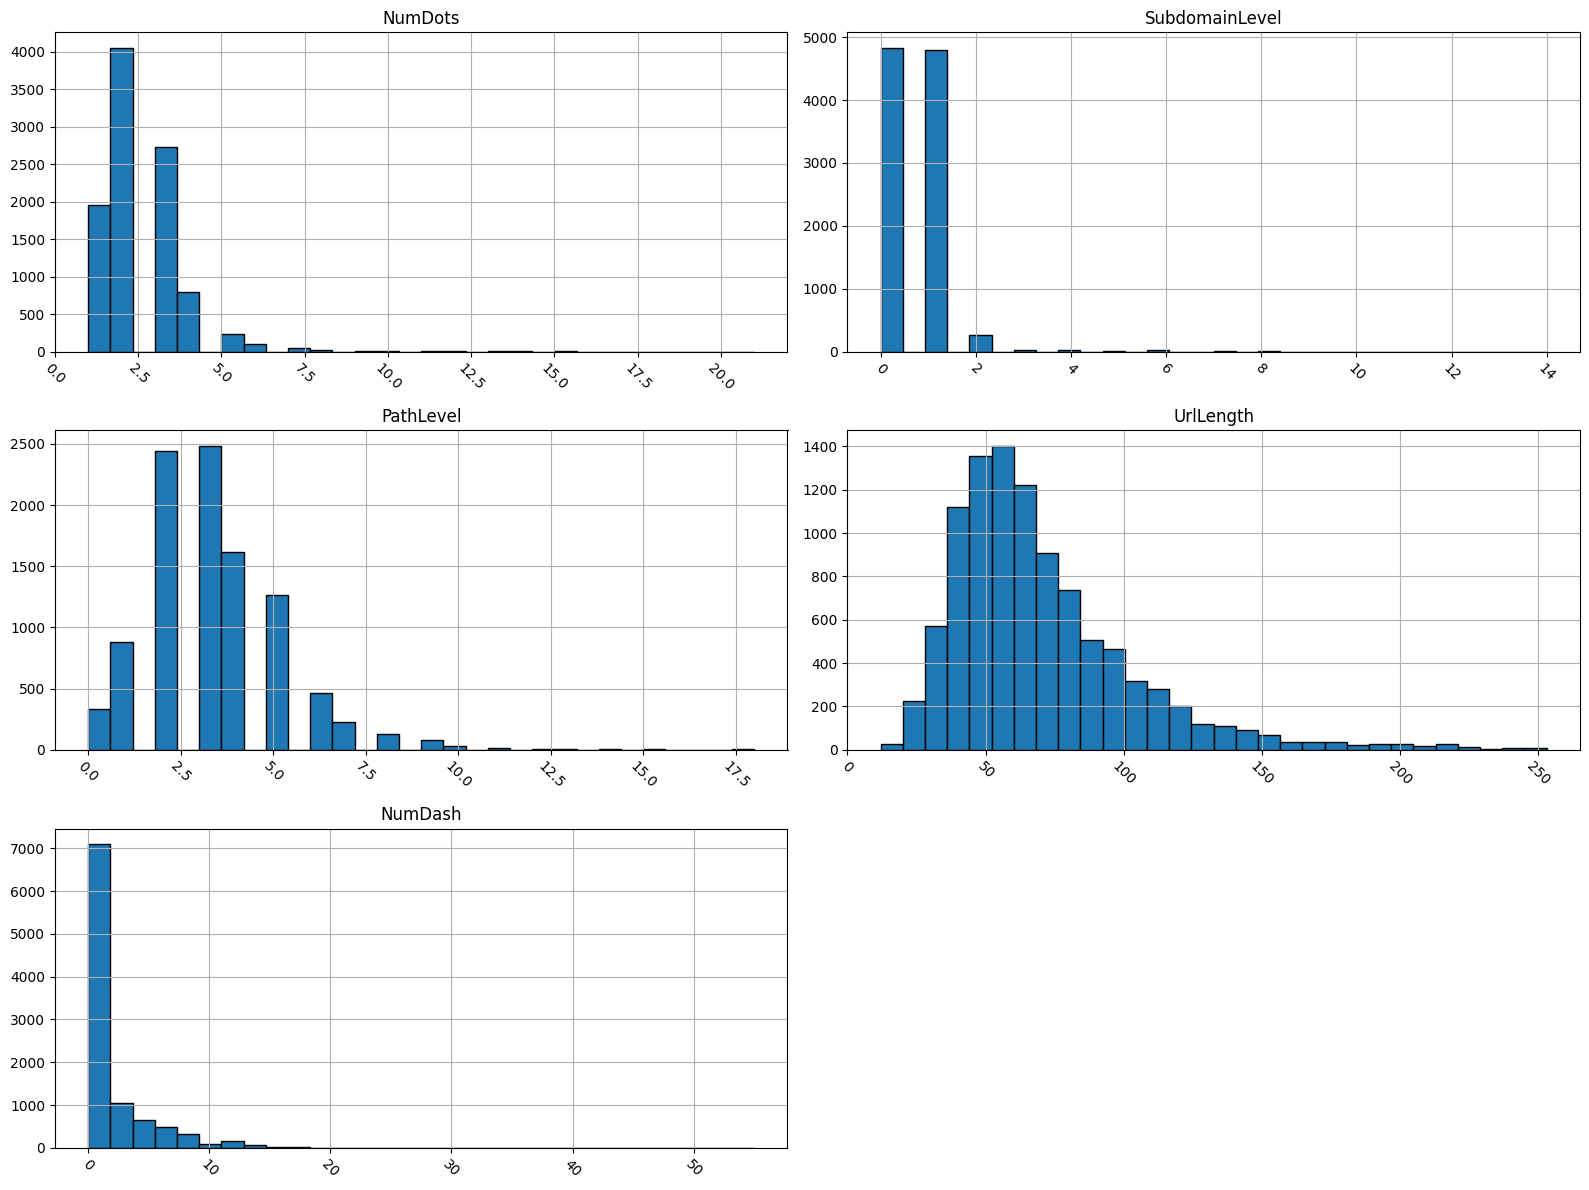

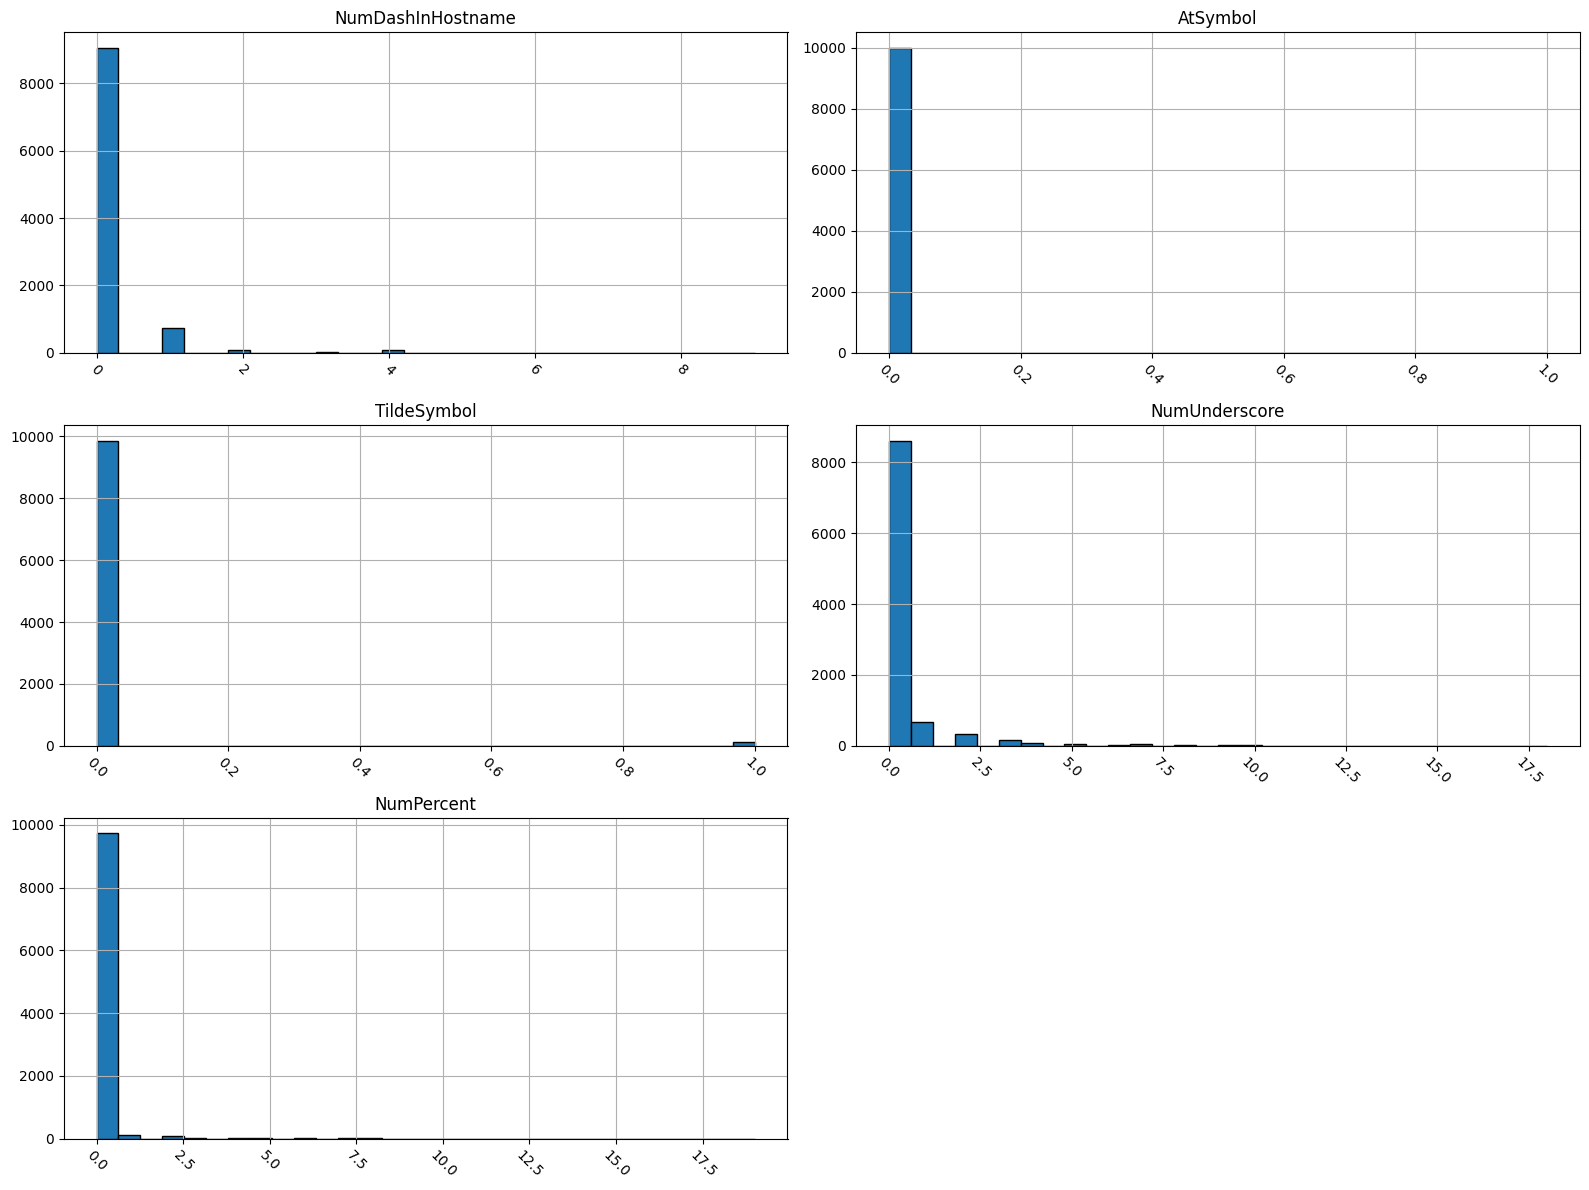

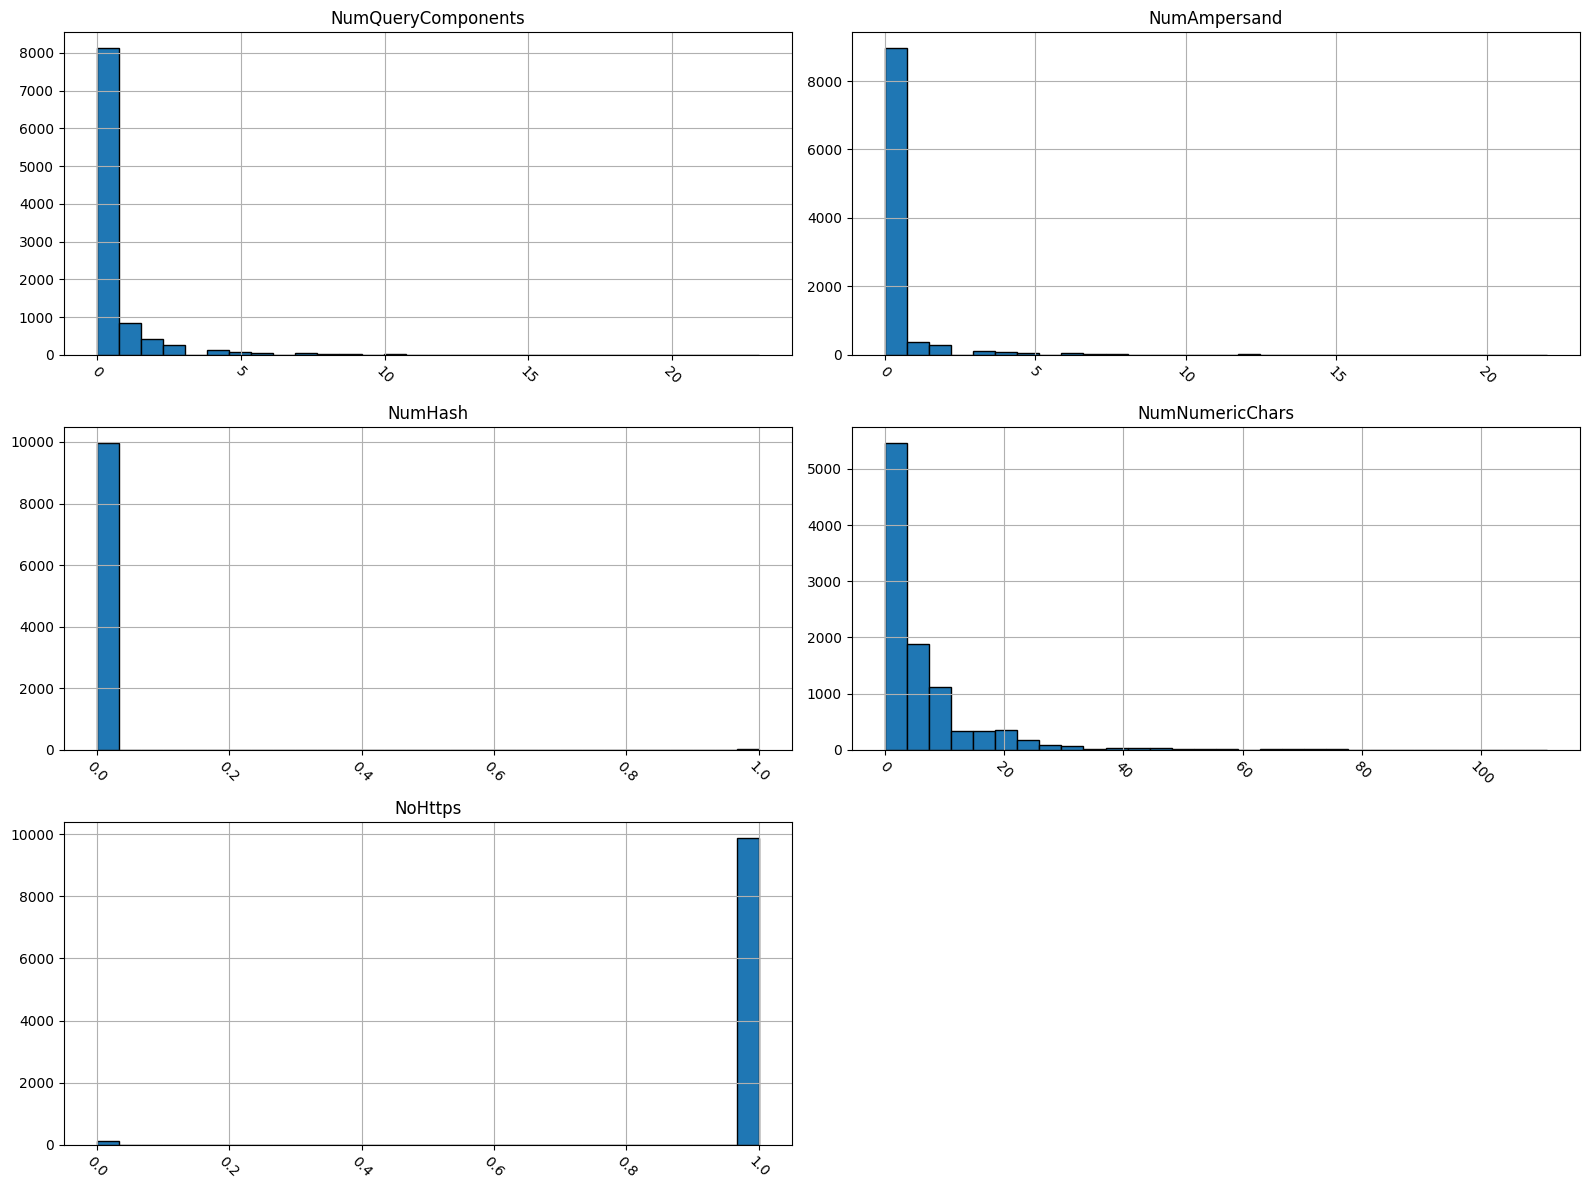

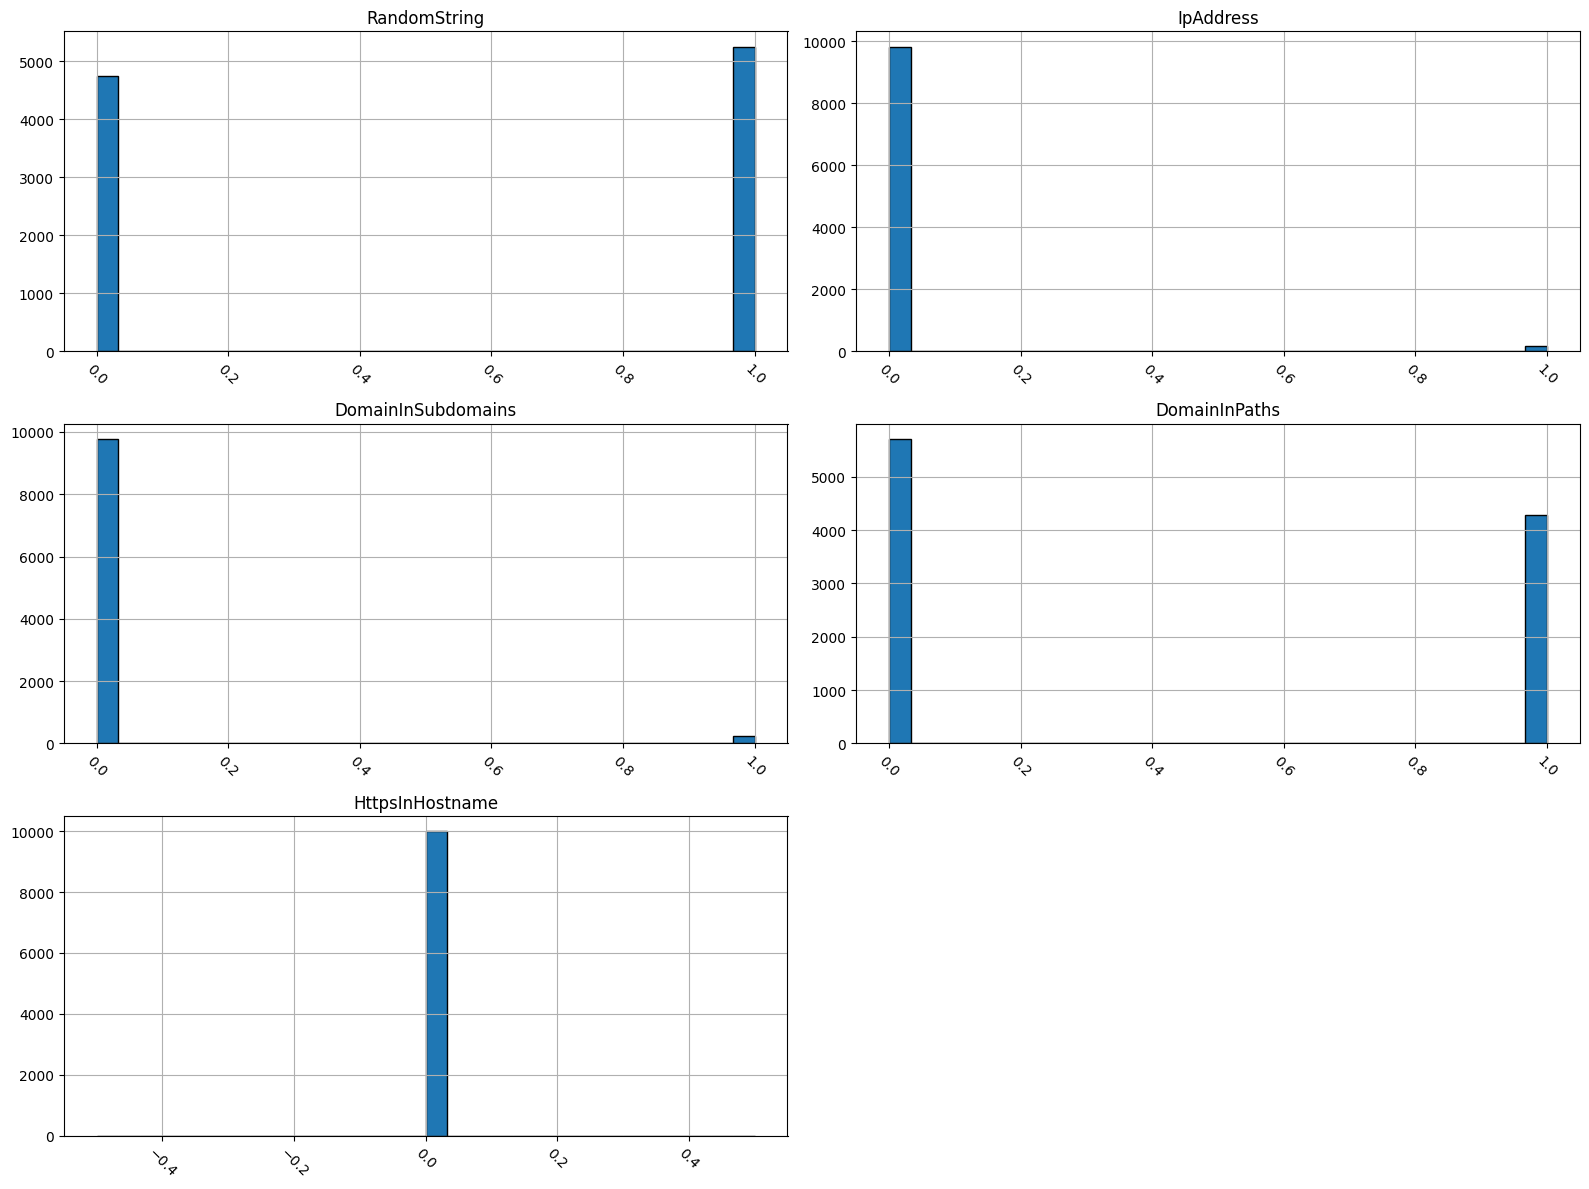

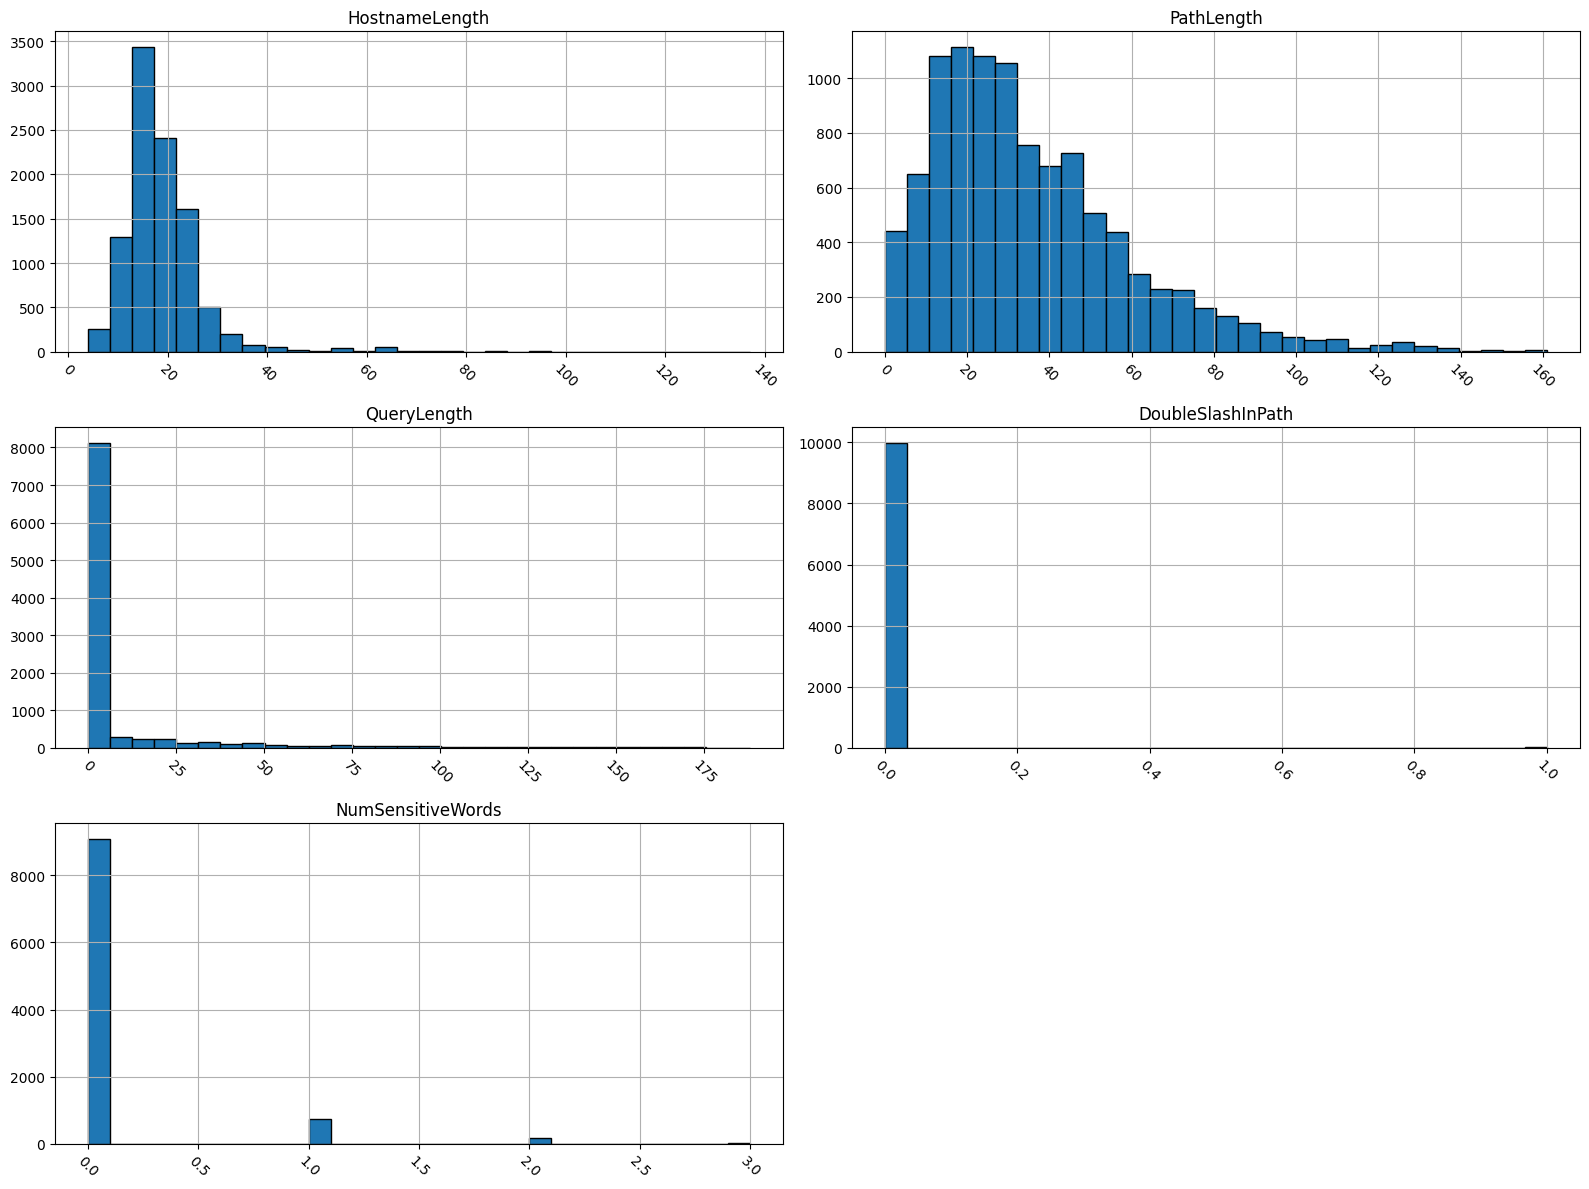

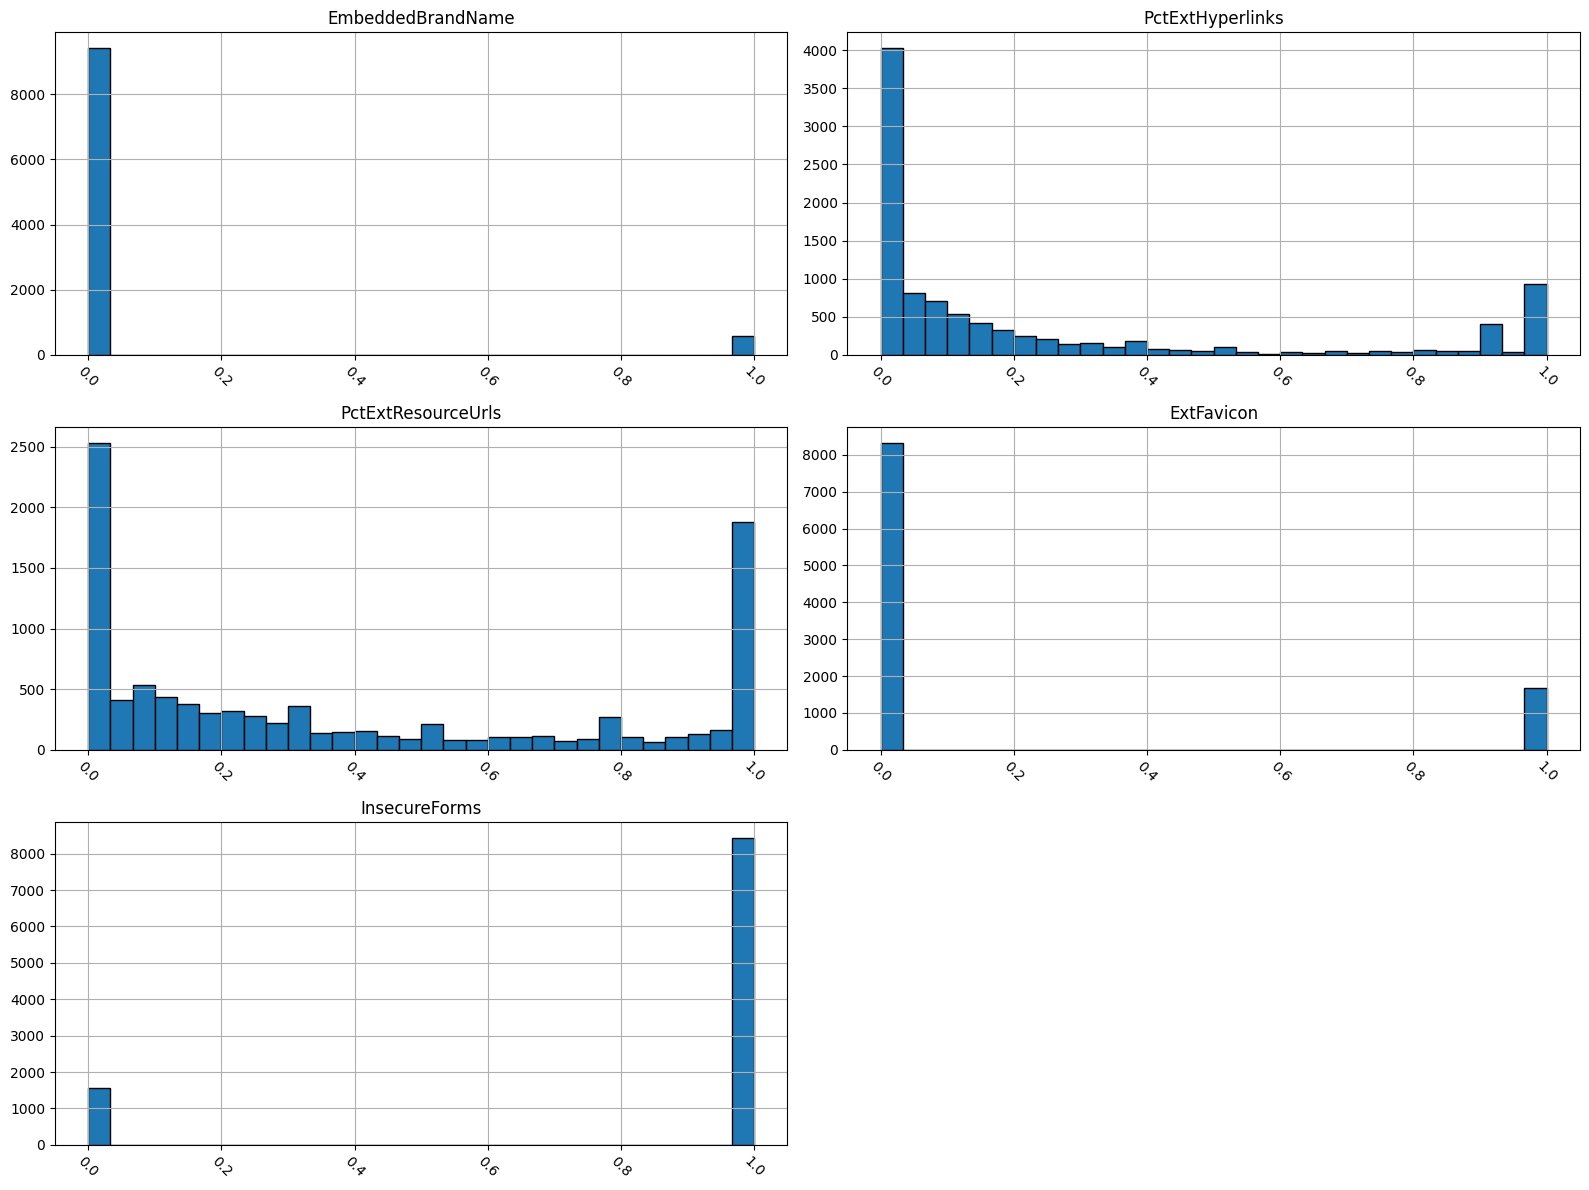

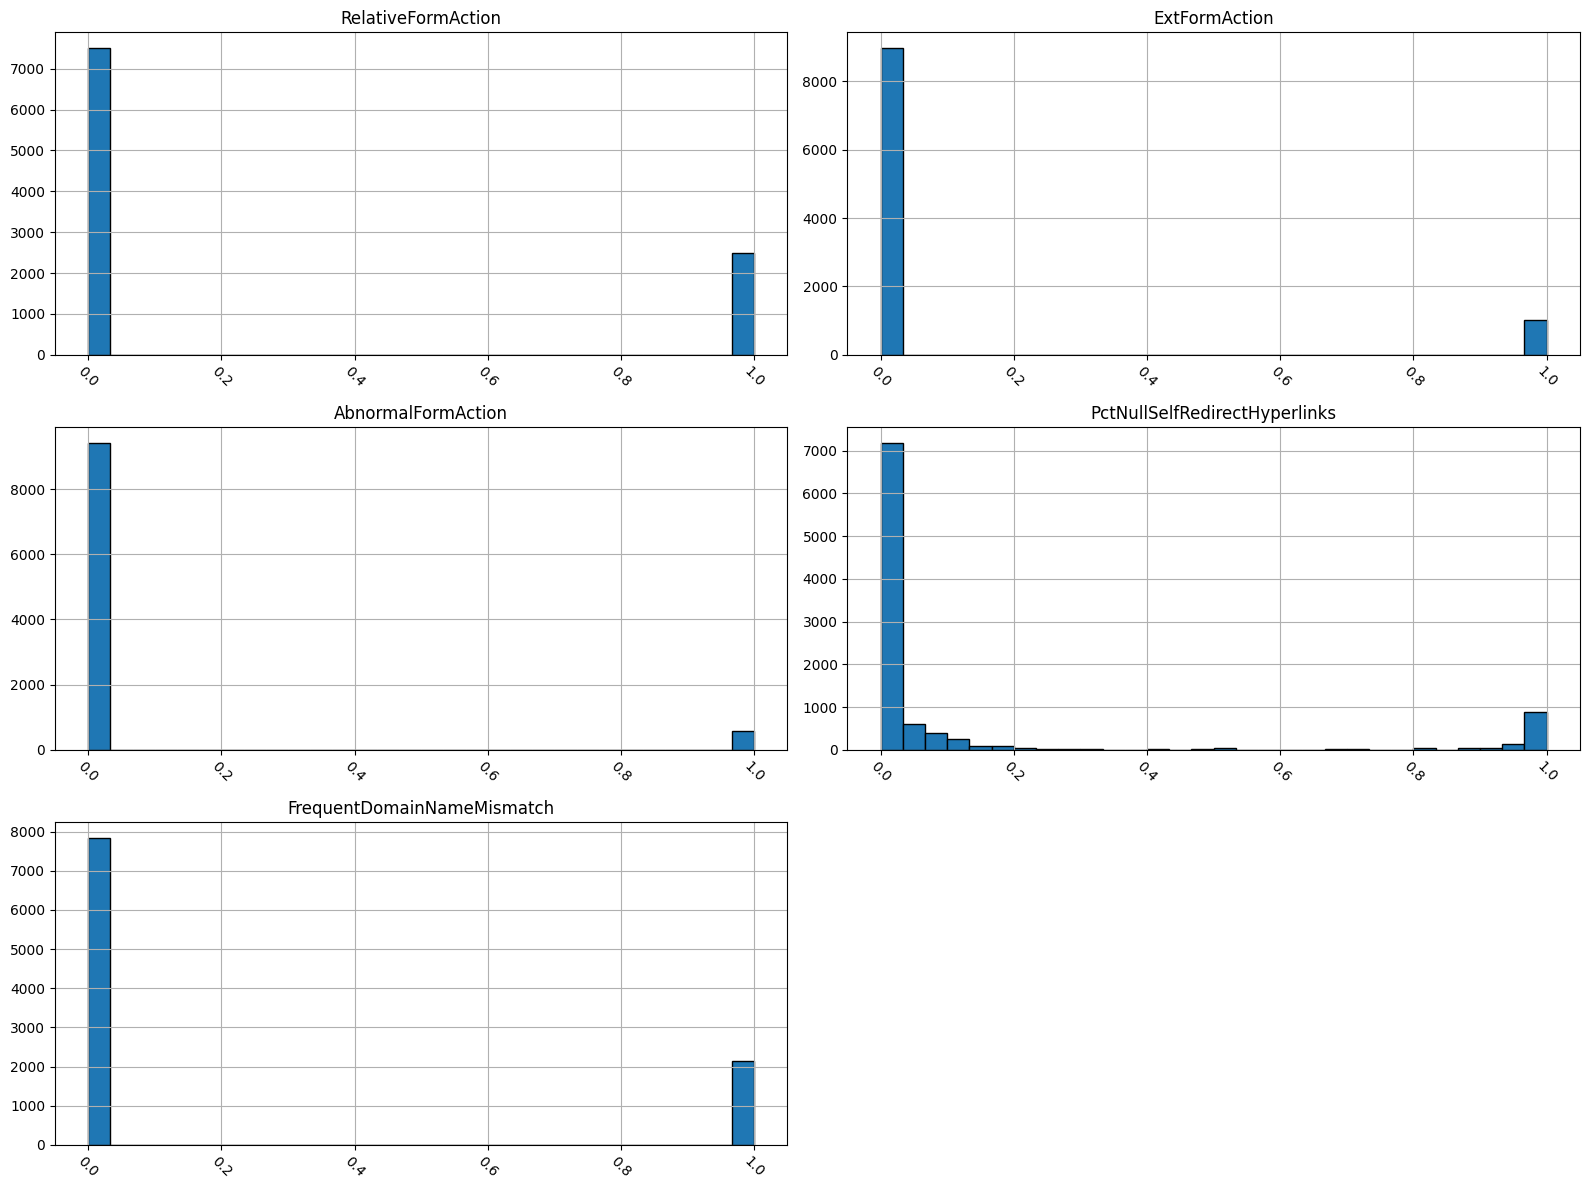

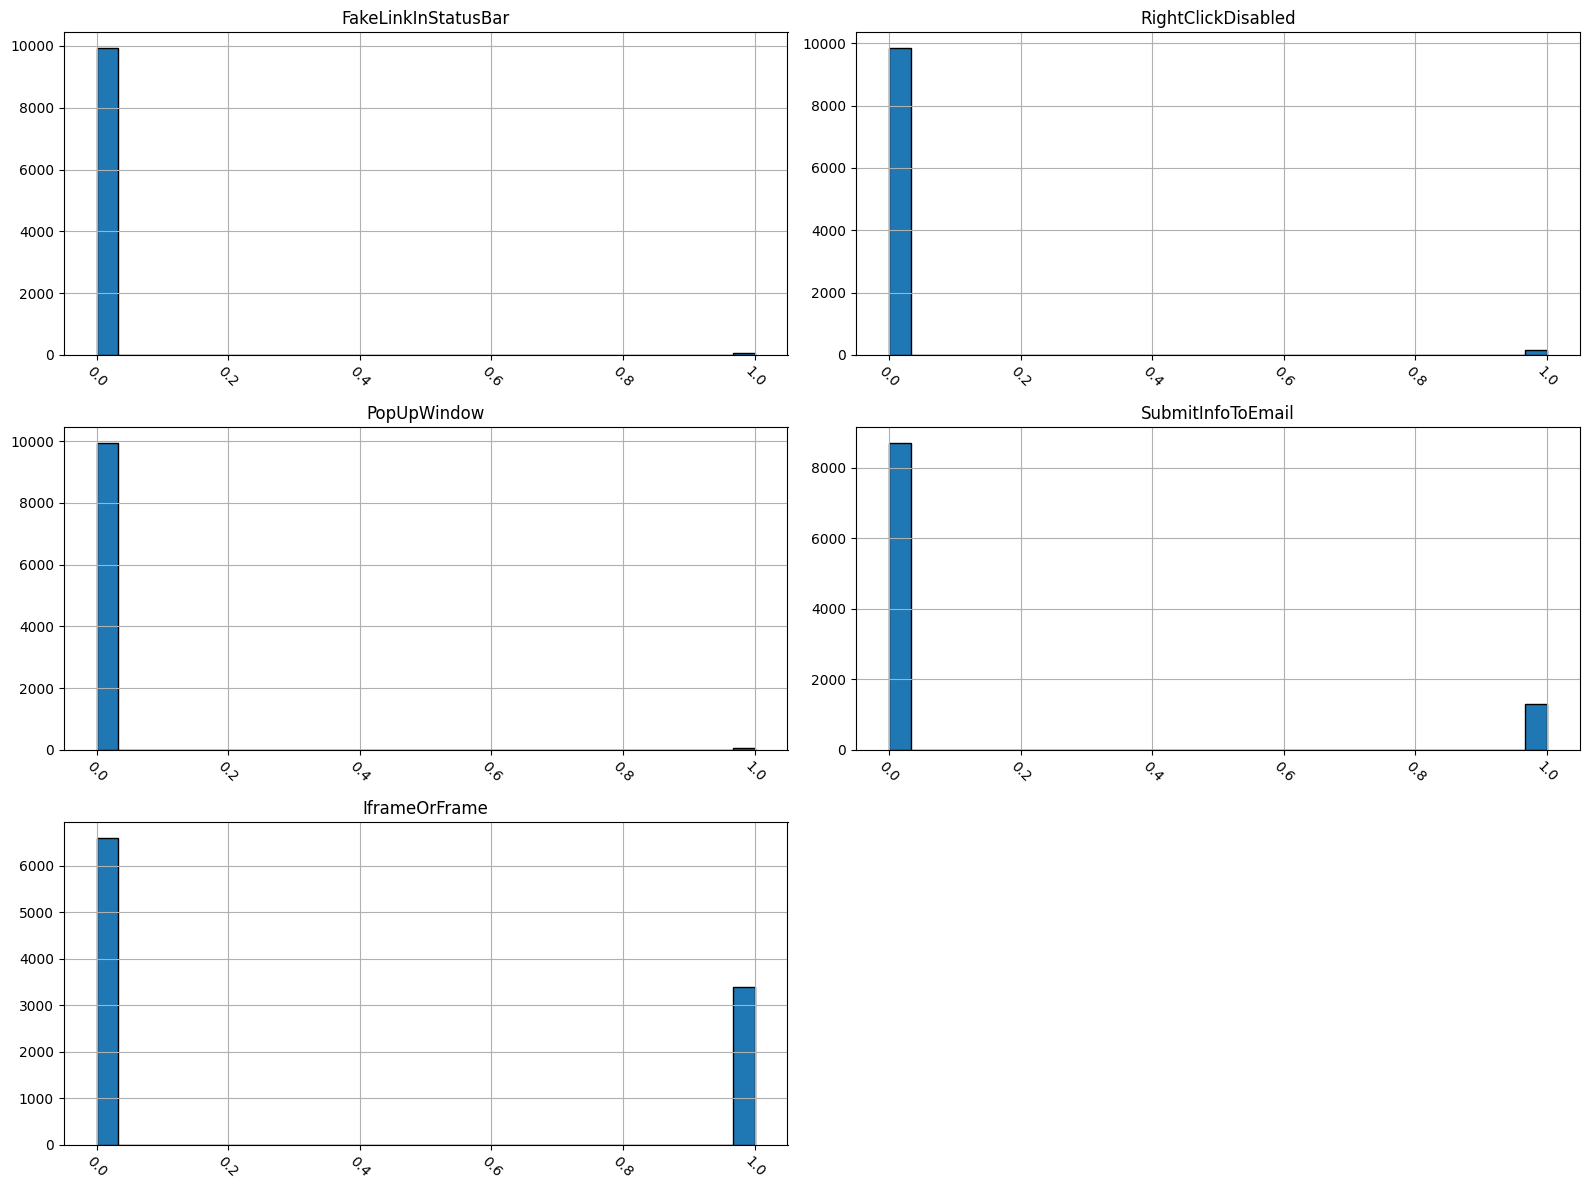

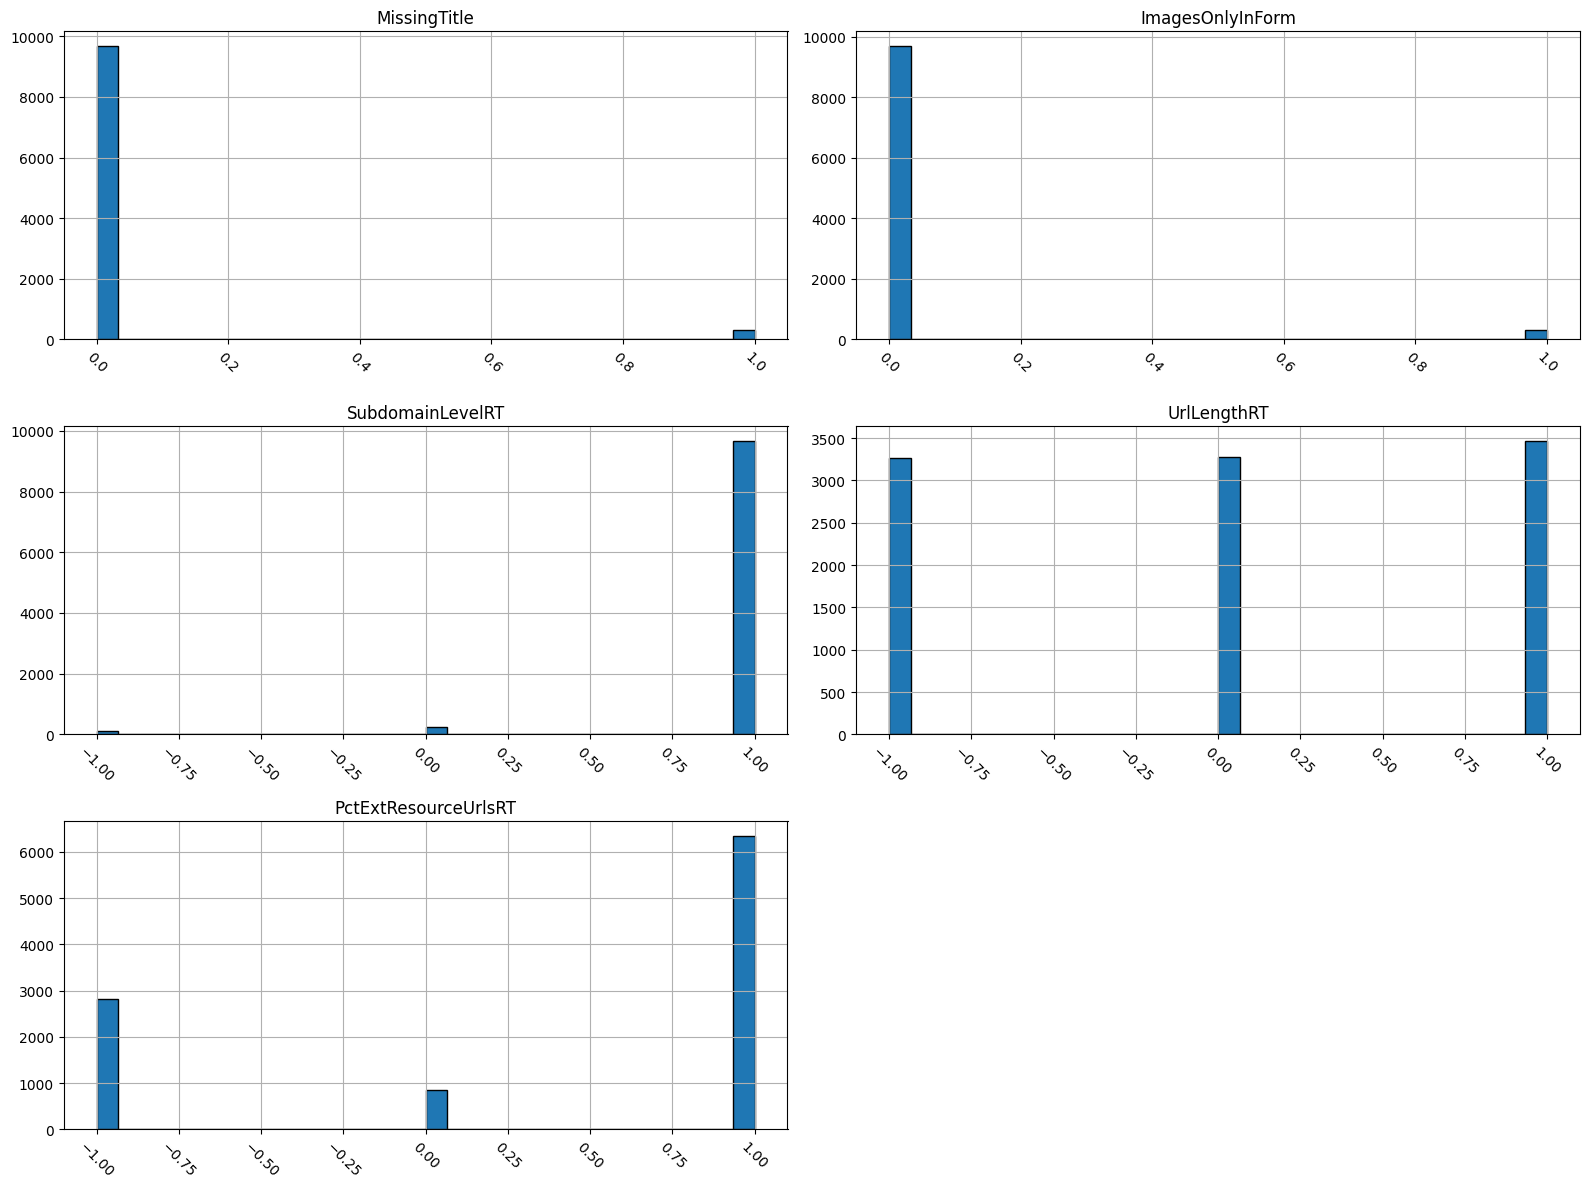

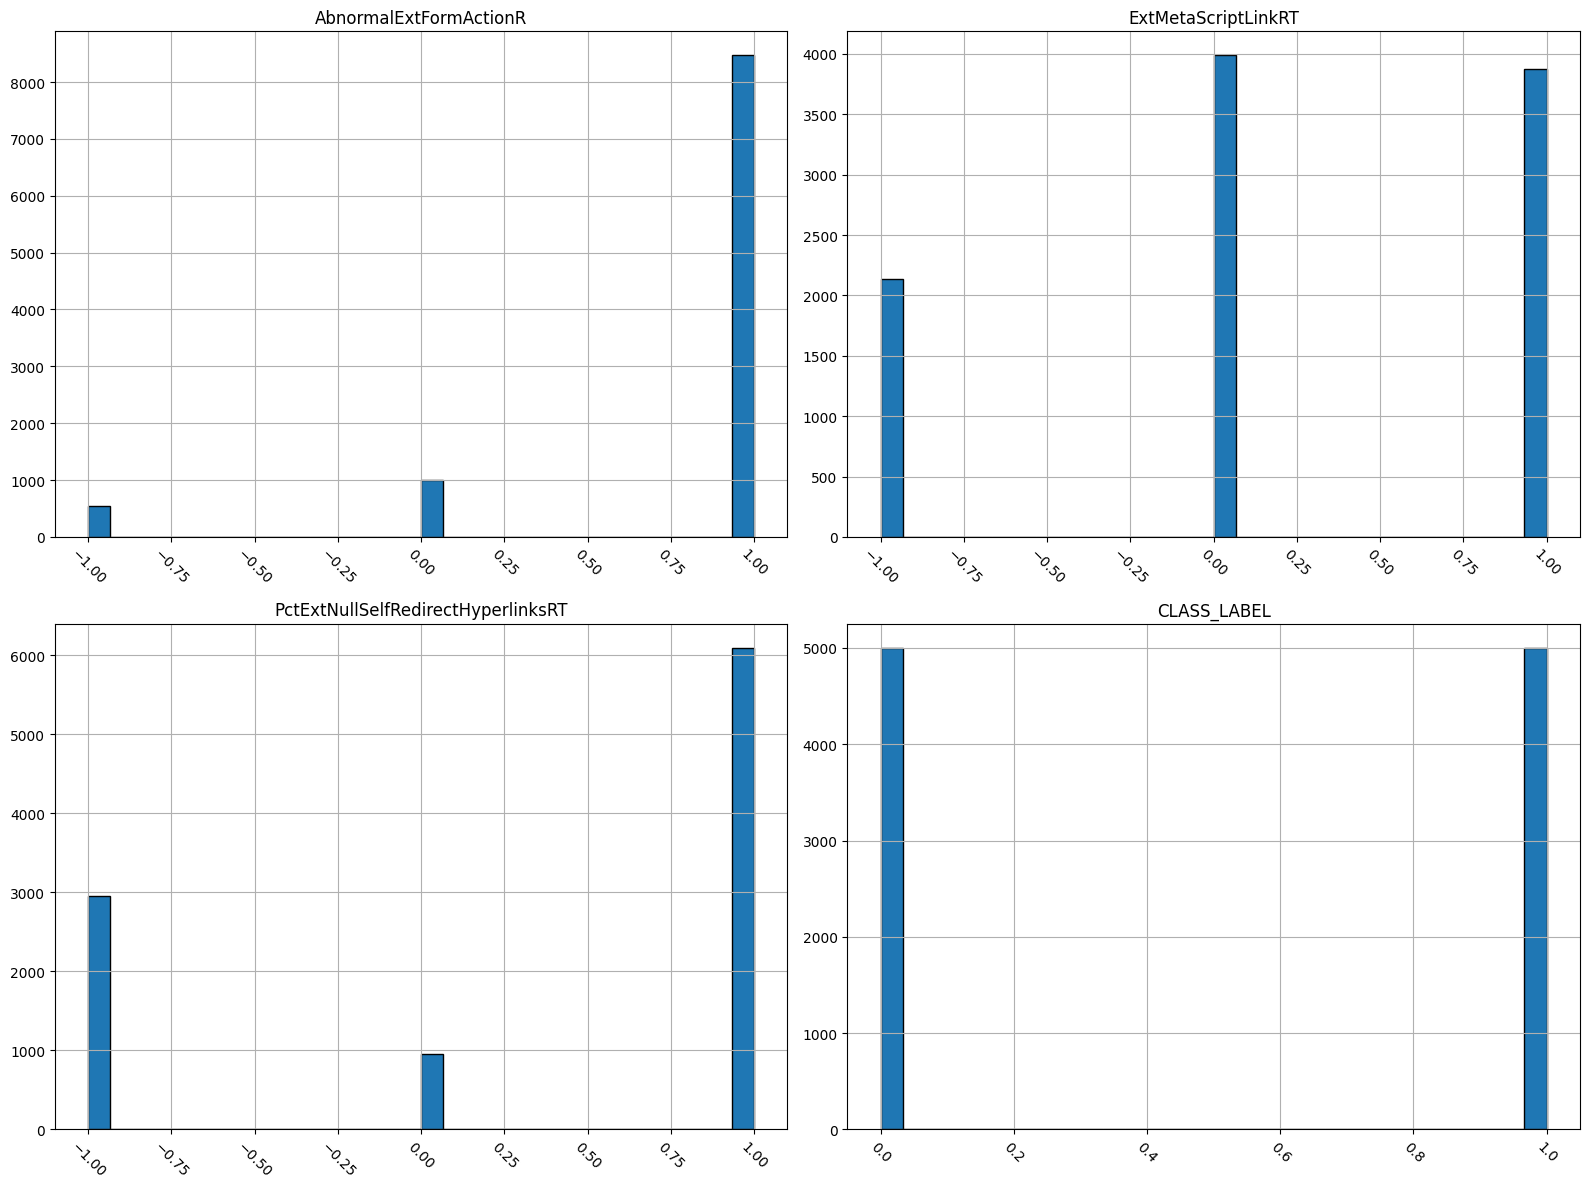

In [10]:
import matplotlib.pyplot as plt
n_cols = 5
n_rows = (len(df.columns) + n_cols - 1) // n_cols

for i in range(n_rows):
    cols = df.columns[i*n_cols : (i+1)*n_cols]
    df[cols].hist(figsize=(16, 12), bins=30, edgecolor='black', xrot=-45)
    plt.tight_layout()
    plt.show()

In [11]:
df

NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0         3.0             1.0        5.0       72.0      0.0   
1         3.0             1.0        3.0      144.0      0.0   
2         3.0             1.0        2.0       58.0      0.0   
3         3.0             1.0        6.0       79.0      1.0   
4         3.0             0.0        4.0       46.0      0.0   
...       ...             ...        ...        ...      ...   
9995      3.0             1.0        1.0       50.0      0.0   
9996      2.0             1.0        4.0       59.0      1.0   
9997      2.0             1.0        4.0       57.0      0.0   
9998      3.0             1.0        1.0       49.0      0.0   
9999      3.0             1.0        2.0       52.0      3.0   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
0                   0.0       0.0          0.0            0.0         0.0   
1                   0.0       0.0          0.0            2.0         0.0   
2                   0.0       0.0          0.0            0.0         0.0   
3                   0.0       0.0          0.0            0.0         0.0   
4                   0.0       0.0          0.0            0.0         0.0   
...                 ...       ...          ...            ...         ...   
9995                0.0       0.0          0.0            0.0         0.0   
9996                0.0       0.0          0.0            0.0         0.0   
9997                0.0       0.0          0.0            0.0         0.0   
9998                0.0       0.0          0.0            0.0         0.0   
9999                0.0       0.0          0.0            0.0         0.0   

      ...  IframeOrFrame  MissingTitle  ImagesOnlyInForm  SubdomainLevelRT  \
0     ...            0.0           0.0               1.0               1.0   
1     ...            0.0           0.0               0.0               1.0   
2     ...            0.0           0.0               0.0               1.0   
3     ...            0.0           0.0               0.0               1.0   
4     ...            1.0           0.0               0.0               1.0   
...   ...            ...           ...               ...               ...   
9995  ...            0.0           0.0               0.0               1.0   
9996  ...            1.0           0.0               0.0               1.0   
9997  ...            0.0           0.0               0.0               1.0   
9998  ...            1.0           0.0               0.0               1.0   
9999  ...            0.0           0.0               0.0               1.0   

      UrlLengthRT  PctExtResourceUrlsRT  AbnormalExtFormActionR  \
0             0.0                   1.0                     1.0   
1            -1.0                   1.0                     1.0   
2             0.0                  -1.0                     1.0   
3            -1.0                   1.0                     1.0   
4             1.0                  -1.0                     0.0   
...           ...                   ...                     ...   
9995          1.0                  -1.0                     1.0   
9996          0.0                   0.0                     1.0   
9997          0.0                   1.0                     1.0   
9998          1.0                   0.0                     1.0   
9999          1.0                   1.0                     1.0   

      ExtMetaScriptLinkRT  PctExtNullSelfRedirectHyperlinksRT  CLASS_LABEL  
0                    -1.0                                 1.0            1  
1                     1.0                                 1.0            1  
2                    -1.0                                 0.0            1  
3                     1.0                                -1.0            1  
4                    -1.0                                -1.0            1  
...                   ...                                 ...          ...  
9995                  0.0      

In [12]:
X = df.iloc[: ,:-1].values
Y = df['CLASS_LABEL'].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=.10,random_state=42, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9000, 48), (9000,), (1000, 48), (1000,))

In [14]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training Time: 0.3490 seconds
Testing Time: 0.0037 seconds
*******************************************
Training Accuracy: 0.9466666666666667
Testing Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       508
           1       0.94      0.94      0.94       492

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

Accuracy Score: 0.94
Precision Score: 0.9399673552991631
Recall Score: 0.9400166442609308
F1 Score: 0.9399882376945881
Matthews Correlation Coefficient: 0.879983998179727
*******************************************
[[477  31]
 [ 29 463]]
True Positive =  463
False Positive =  31
False Negative =  29
True Negative =  477
*******************************************


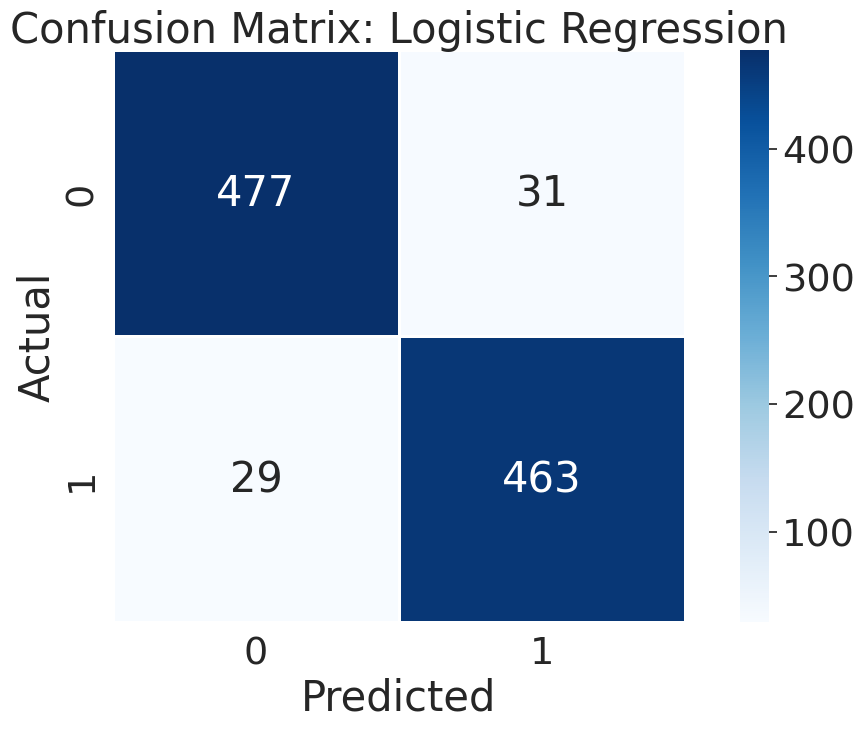

AUC Score = 0.940


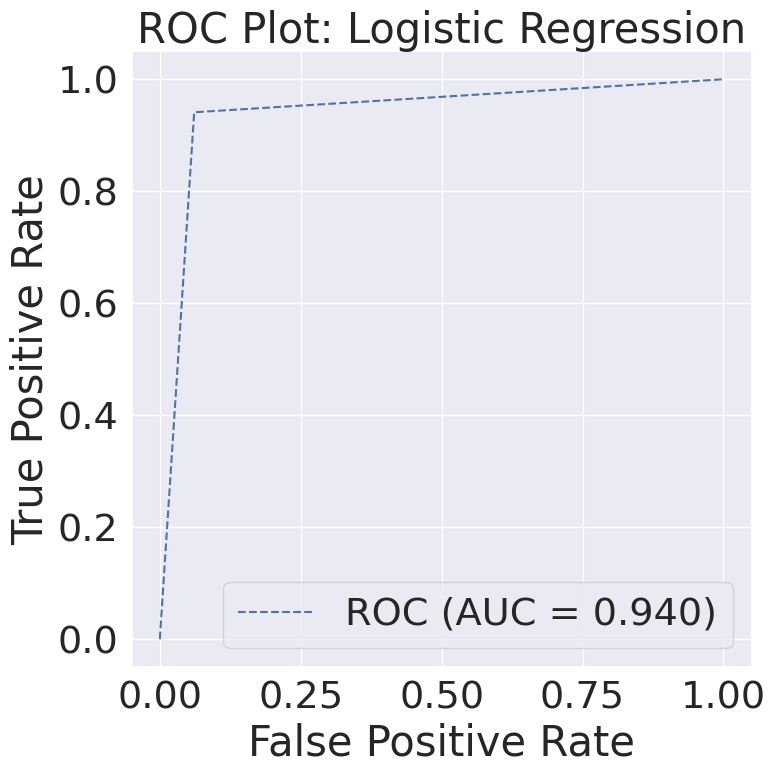

In [15]:
import time
from sklearn.linear_model import LogisticRegression
# Initialize the model
model1 = LogisticRegression(C=1.0)

# --------------------------
# Measure Training Time
# --------------------------
start_train = time.time()
model1.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# --------------------------
# Measure Testing Time
# --------------------------
start_test = time.time()
predictions1 = model1.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test

print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")
print("*******************************************")

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, model1.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions1)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report
report = classification_report(y_test, predictions1)
print("Classification Report:\n", report)

# Calculate metrics
accuracy = accuracy_score(y_test, predictions1)
precision = precision_score(y_test, predictions1, average='macro')
recall = recall_score(y_test, predictions1, average='macro')
f1 = f1_score(y_test, predictions1, average='macro')
mcc = matthews_corrcoef(y_test, predictions1)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions1)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True Positive = ', TP)
print('False Positive = ', FP)
print('False Negative = ', FN)
print('True Negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12,8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':30}, fmt=".0f", square=True, cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Logistic Regression')
plt.tight_layout()
plt.show()

# ROC curve
lr_auc = roc_auc_score(y_test, predictions1)
print('AUC Score = %.3f' % (lr_auc))
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions1)

plt.figure(figsize=(8, 8))
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='ROC (AUC = %0.3f)' % lr_auc)
plt.title('ROC Plot: Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 0.1244 seconds
Testing Time: 0.0060 seconds
*******************************************
Training Accuracy: 0.9492222222222222
Testing Accuracy: 0.966
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       508
           1       0.96      0.97      0.97       492

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

Accuracy Score: 0.966
Precision Score: 0.9659710998383767
Recall Score: 0.9660233019653031
F1 Score: 0.9659933346935998
Matthews Correlation Coefficient: 0.9319944003417279
*******************************************
[[490  18]
 [ 16 476]]
True Positive =  476
False Positive =  18
False Negative =  16
True Negative =  490
*******************************************


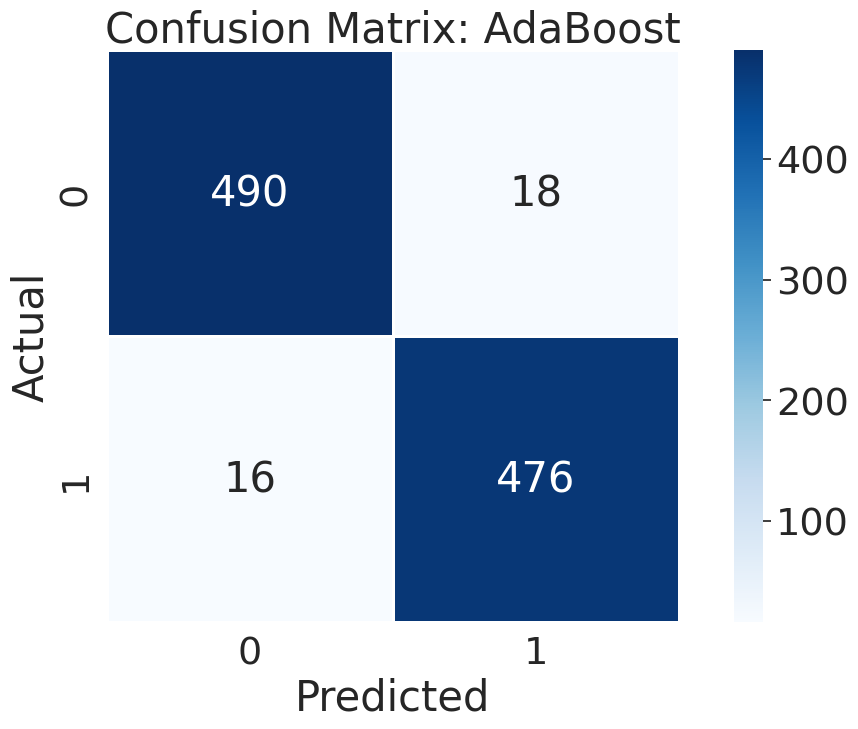

AUC Score = 0.966


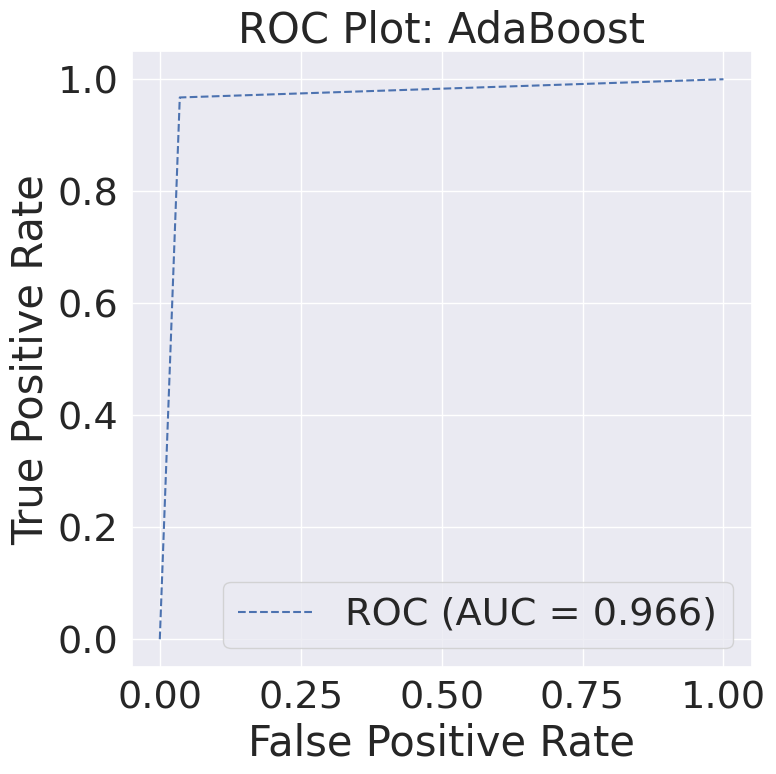

In [16]:
from sklearn.ensemble import AdaBoostClassifier
# Initialize the model
model3 = AdaBoostClassifier(n_estimators=10)

# --------------------------
# Measure Training Time
# --------------------------
start_train = time.time()
model3.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# --------------------------
# Measure Testing Time
# --------------------------
start_test = time.time()
predictions3 = model3.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test

print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")
print("*******************************************")

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, model3.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions3)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report
report = classification_report(y_test, predictions3)
print("Classification Report:\n", report)

# Calculate metrics
accuracy = accuracy_score(y_test, predictions3)
precision = precision_score(y_test, predictions3, average='macro')
recall = recall_score(y_test, predictions3, average='macro')
f1 = f1_score(y_test, predictions3, average='macro')
mcc = matthews_corrcoef(y_test, predictions3)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions3)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True Positive = ', TP)
print('False Positive = ', FP)
print('False Negative = ', FN)
print('True Negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12,8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: AdaBoost')
plt.tight_layout()
plt.show()

# ROC curve
ab_auc = roc_auc_score(y_test, predictions3)
print('AUC Score = %.3f' % (ab_auc))
ab_fpr, ab_tpr, _ = roc_curve(y_test, predictions3)

plt.figure(figsize=(8, 8))
plt.plot(ab_fpr, ab_tpr, linestyle='--', label='ROC (AUC = %0.3f)' % ab_auc)
plt.title('ROC Plot: AdaBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 10.3822 seconds
Testing Time: 0.0016 seconds
*******************************************
Training Accuracy: 0.9995555555555555
Testing Accuracy: 0.982
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       508
           1       0.97      0.99      0.98       492

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Accuracy Score: 0.982
Precision Score: 0.9820397126354021
Recall Score: 0.9821554317905383
F1 Score: 0.9819993519766712
Matthews Correlation Coefficient: 0.9641951374818468
*******************************************
[[494  14]
 [  4 488]]
True Positive =  488
False Positive =  14
False Negative =  4
True Negative =  494
*******************************************


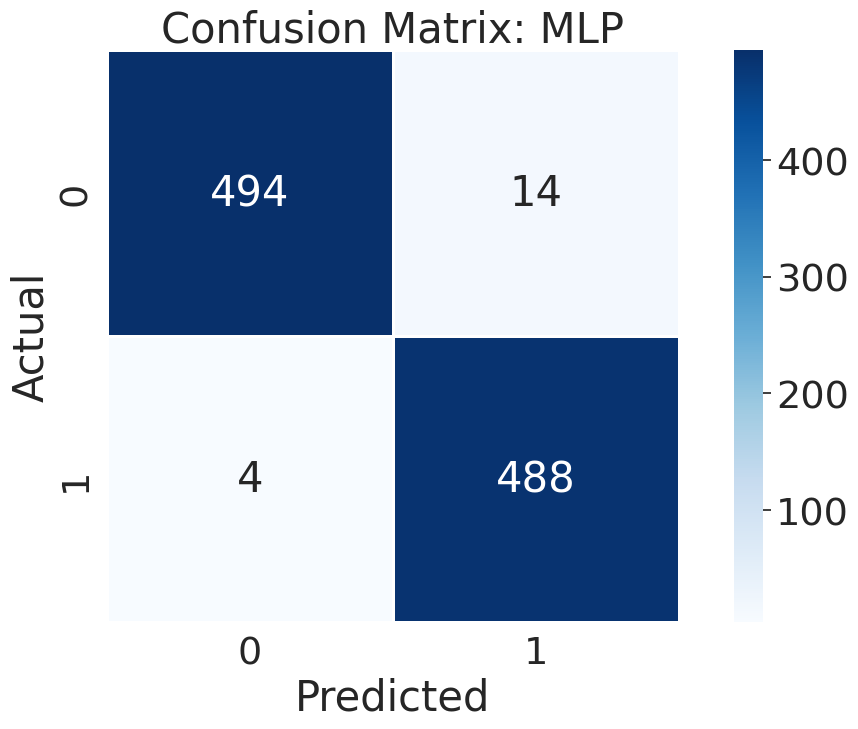

AUC Score = 0.982


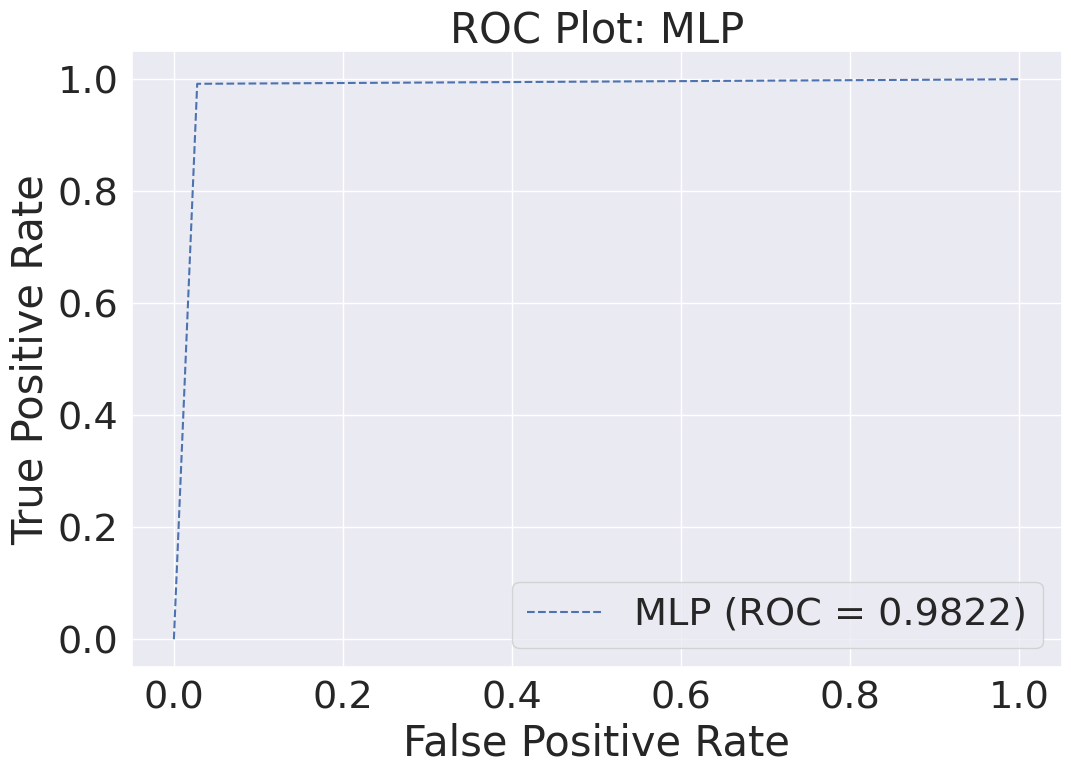

In [17]:
from sklearn.neural_network import MLPClassifier
# Initialize the model
model_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# --------------------------
# Measure Training Time
# --------------------------
start_train = time.time()
model_mlp.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# --------------------------
# Measure Testing Time
# --------------------------
start_test = time.time()
predictions_mlp = model_mlp.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test

print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")
print("*******************************************")

# Accuracy scores
train_accuracy = accuracy_score(y_train, model_mlp.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_mlp)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification report
report = classification_report(y_test, predictions_mlp)
print("Classification Report:\n", report)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_mlp)
precision = precision_score(y_test, predictions_mlp, average='macro')
recall = recall_score(y_test, predictions_mlp, average='macro')
f1 = f1_score(y_test, predictions_mlp, average='macro')
mcc = matthews_corrcoef(y_test, predictions_mlp)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_mlp)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True Positive = ', TP)
print('False Positive = ', FP)
print('False Negative = ', FN)
print('True Negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12,8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: MLP')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
mlp_auc = roc_auc_score(y_test, predictions_mlp)
print('AUC Score = %.3f' % mlp_auc)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, predictions_mlp)

plt.figure(figsize=(12, 8))
plt.plot(mlp_fpr, mlp_tpr, linestyle='--', label='MLP (ROC = %0.4f)' % mlp_auc)
plt.title('ROC Plot: MLP')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 0.0583 seconds
Testing Time: 0.0005 seconds
*******************************************
Training Accuracy: 0.988
Testing Accuracy: 0.977
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       508
           1       0.97      0.98      0.98       492

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Accuracy Score: 0.977
Precision Score: 0.976967696769677
Recall Score: 0.9770421227834325
F1 Score: 0.976996112342986
Matthews Correlation Coefficient: 0.9540098166499782
*******************************************
[[495  13]
 [ 10 482]]
True Positive =  482
False Positive =  13
False Negative =  10
True Negative =  495
*******************************************


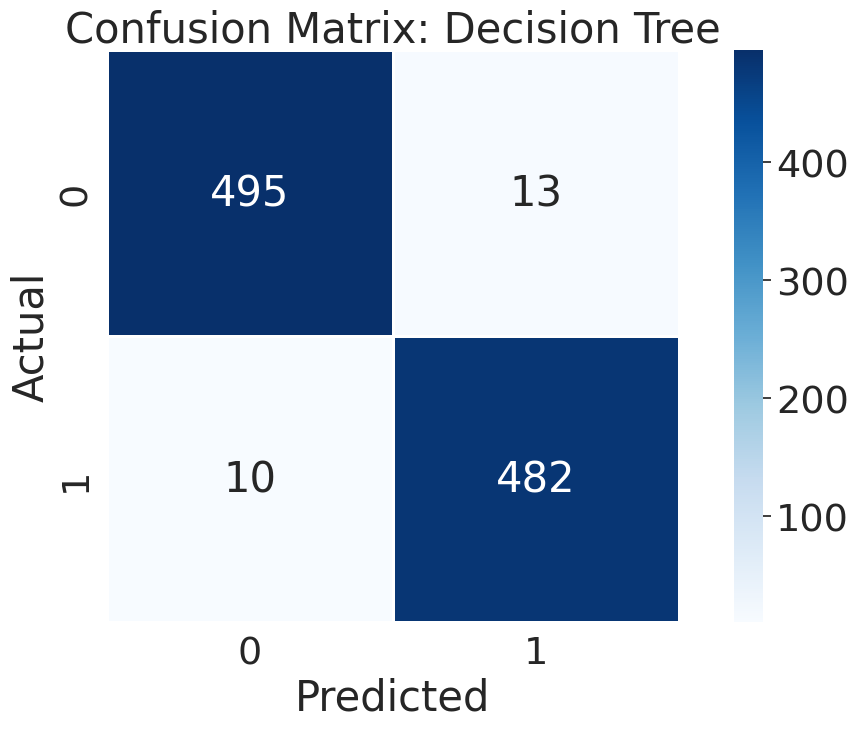

AUC Score = 0.977


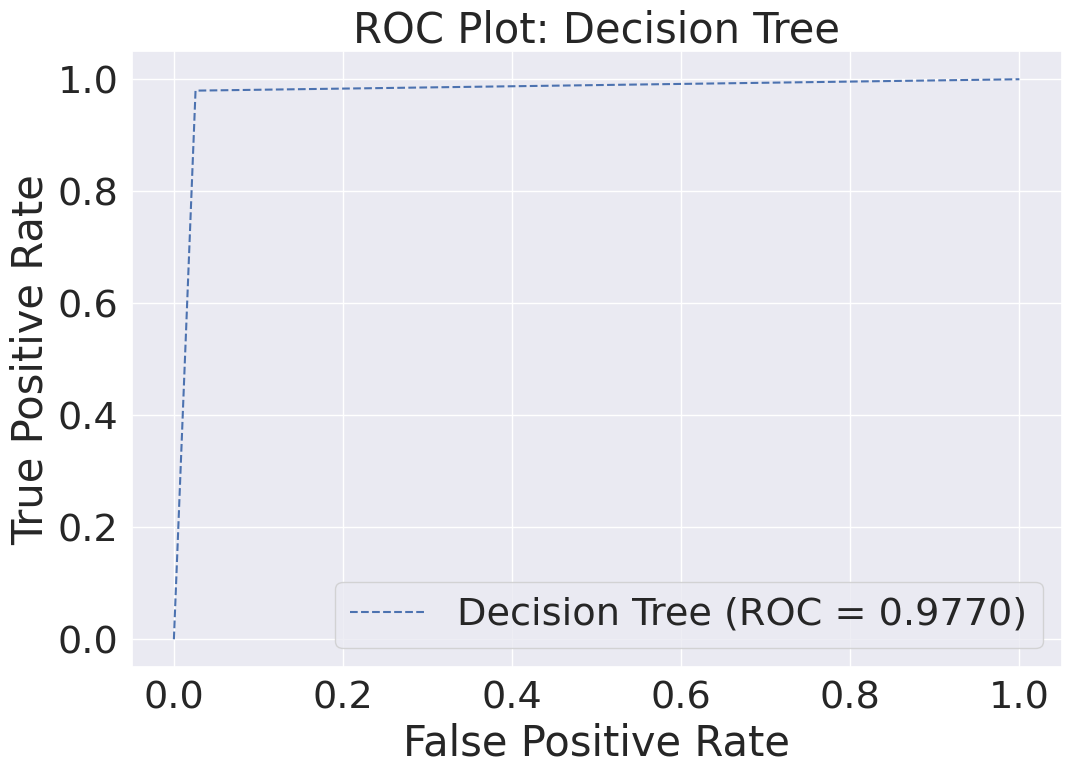

In [18]:

from sklearn.tree import DecisionTreeClassifier
# Initialize Decision Tree (no n_estimators)
model_dt = DecisionTreeClassifier(max_depth=10, random_state=42)

# --------------------------
# Measure Training Time
# --------------------------
start_train = time.time()
model_dt.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# --------------------------
# Measure Testing Time
# --------------------------
start_test = time.time()
predictions_dt = model_dt.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test

print(f"Training Time: {training_time:.4f} seconds")
print(f"Testing Time: {testing_time:.4f} seconds")
print("*******************************************")

# Accuracy scores
train_accuracy = accuracy_score(y_train, model_dt.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_dt)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification Report
report = classification_report(y_test, predictions_dt)
print("Classification Report:\n", report)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_dt)
precision = precision_score(y_test, predictions_dt, average='macro')
recall = recall_score(y_test, predictions_dt, average='macro')
f1 = f1_score(y_test, predictions_dt, average='macro')
mcc = matthews_corrcoef(y_test, predictions_dt)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_dt)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True Positive = ', TP)
print('False Positive = ', FP)
print('False Negative = ', FN)
print('True Negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12,8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Decision Tree')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
dt_auc = roc_auc_score(y_test, predictions_dt)
print('AUC Score = %.3f' % dt_auc)

dt_fpr, dt_tpr, _ = roc_curve(y_test, predictions_dt)

plt.figure(figsize=(12, 8))
plt.plot(dt_fpr, dt_tpr, linestyle='--', label='Decision Tree (ROC = %0.4f)' % dt_auc)
plt.title('ROC Plot: Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 0.0821 seconds
Testing Time: 0.0026 seconds
Training Accuracy: 0.9841111111111112
Testing Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       508
           1       0.98      0.98      0.98       492

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Accuracy Score: 0.98
Precision Score: 0.9800320128051221
Recall Score: 0.9799628704948466
F1 Score: 0.9799935178997996
Matthews Correlation Coefficient: 0.9599948808100289
*******************************************
[[499   9]
 [ 11 481]]
True positive =  481
False positive =  9
False negative =  11
True negative =  499
*******************************************


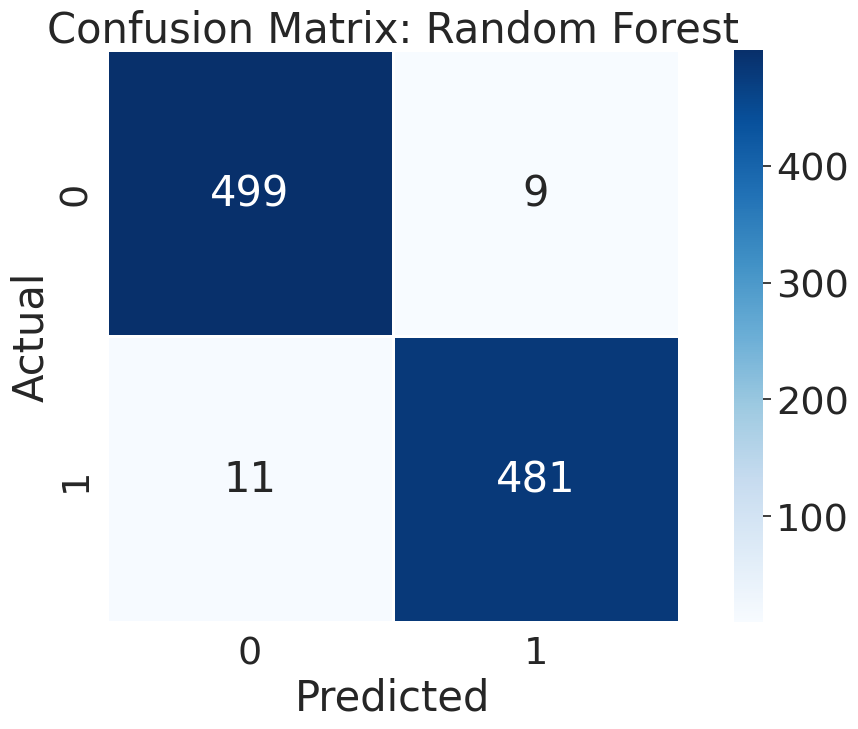

AUC Score = 0.980


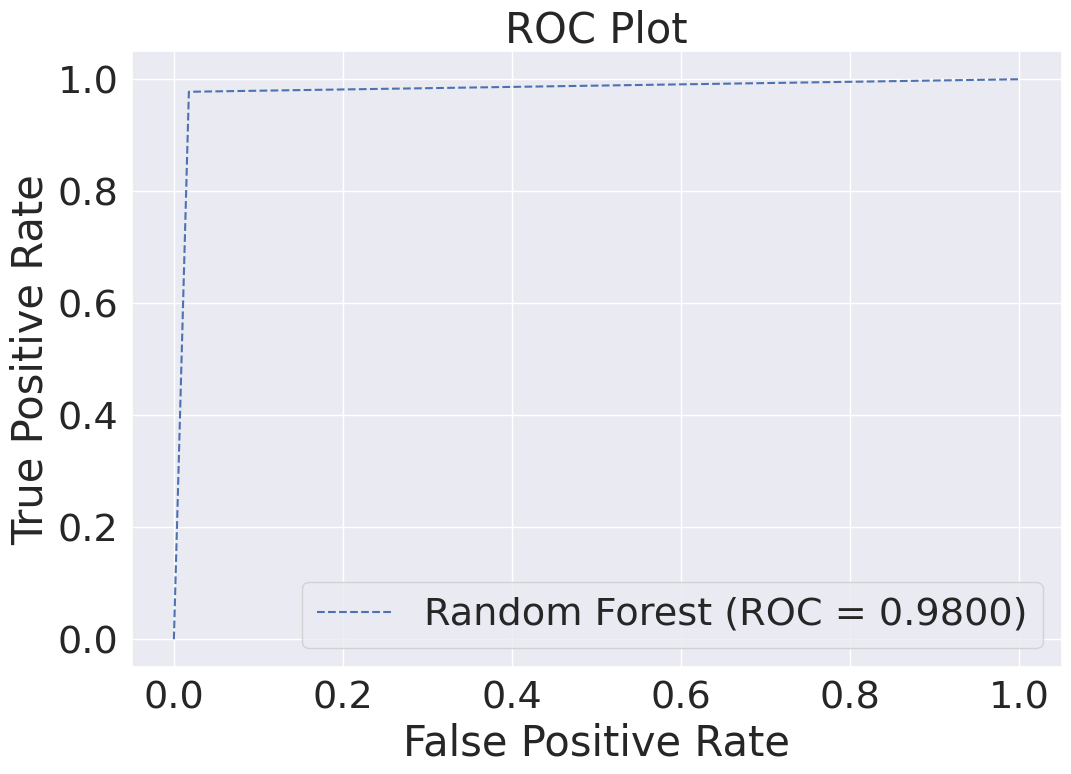

In [19]:
from sklearn.ensemble import RandomForestClassifier
# Initialize model
model_rf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)

# Measure training time
start_train = time.time()
model_rf.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train
print(f"Training Time: {training_time:.4f} seconds")

# Measure testing (prediction) time
start_test = time.time()
predictions_rf = model_rf.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test
print(f"Testing Time: {testing_time:.4f} seconds")

# Accuracy scores
train_accuracy = accuracy_score(y_train, model_rf.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_rf)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification Report
report = classification_report(y_test, predictions_rf)
print("Classification Report:")
print(report)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_rf)
precision = precision_score(y_test, predictions_rf, average='macro')
recall = recall_score(y_test, predictions_rf, average='macro')
f1 = f1_score(y_test, predictions_rf, average='macro')
mcc = matthews_corrcoef(y_test, predictions_rf)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_rf)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True positive = ', TP)
print('False positive = ', FP)
print('False negative = ', FN)
print('True negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Random Forest')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
rf_auc = roc_auc_score(y_test, predictions_rf)
print('AUC Score = %.3f' % rf_auc)

rf_fpr, rf_tpr, _ = roc_curve(y_test, predictions_rf)

plt.figure(figsize=(12, 8))
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest (ROC = %0.4f)' % rf_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 0.0018 seconds
Testing Time: 0.1143 seconds
Training Accuracy: 0.9637777777777777
Testing Accuracy: 0.948
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       508
           1       0.96      0.94      0.95       492

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

Accuracy Score: 0.948
Precision Score: 0.9482929877120749
Recall Score: 0.947826643620767
F1 Score: 0.9479648242211736
Matthews Correlation Coefficient: 0.8961195099892072
*******************************************
[[487  21]
 [ 31 461]]
True positive =  461
False positive =  21
False negative =  31
True negative =  487
*******************************************


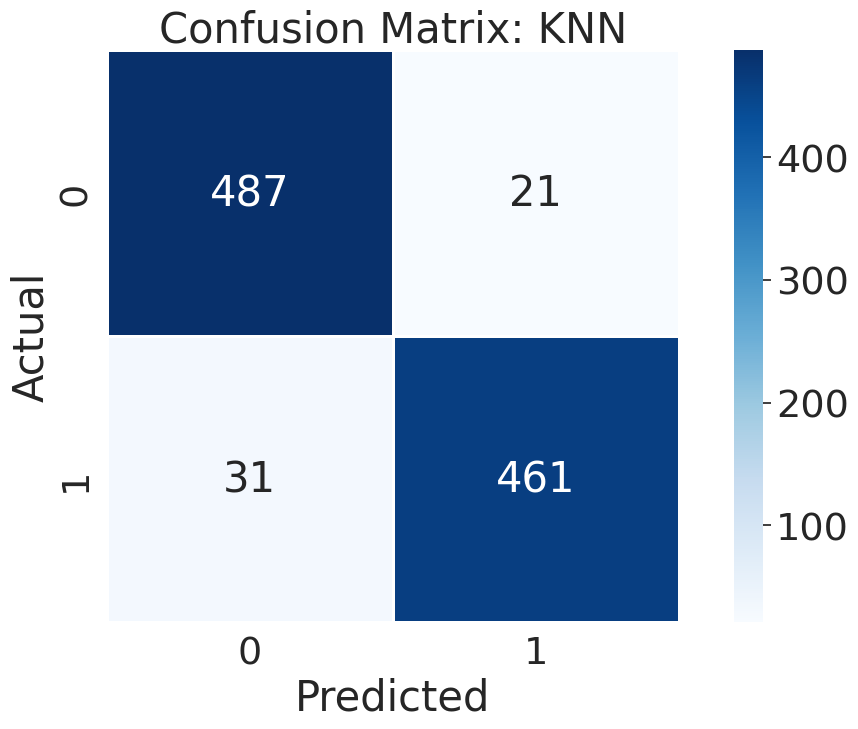

AUC Score = 0.948


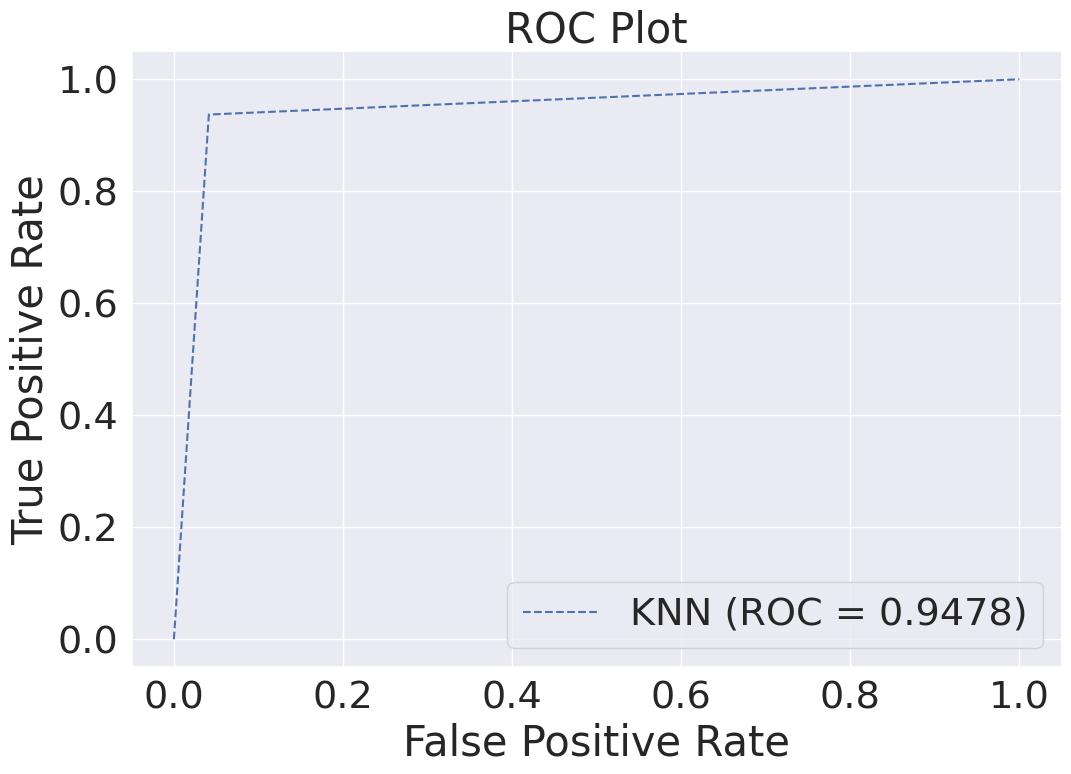

In [20]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)

# Measure training time
start_train = time.time()
model_knn.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train
print(f"Training Time: {training_time:.4f} seconds")

# Measure testing (prediction) time
start_test = time.time()
predictions_knn = model_knn.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test
print(f"Testing Time: {testing_time:.4f} seconds")

# Accuracy scores
train_accuracy = accuracy_score(y_train, model_knn.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_knn)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification Report
report = classification_report(y_test, predictions_knn)
print("Classification Report:")
print(report)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_knn)
precision = precision_score(y_test, predictions_knn, average='macro')
recall = recall_score(y_test, predictions_knn, average='macro')
f1 = f1_score(y_test, predictions_knn, average='macro')
mcc = matthews_corrcoef(y_test, predictions_knn)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_knn)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True positive = ', TP)
print('False positive = ', FP)
print('False negative = ', FN)
print('True negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: KNN')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
knn_auc = roc_auc_score(y_test, predictions_knn)
print('AUC Score = %.3f' % knn_auc)

knn_fpr, knn_tpr, _ = roc_curve(y_test, predictions_knn)

plt.figure(figsize=(12, 8))
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='KNN (ROC = %0.4f)' % knn_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 5.8040 seconds
Testing Time: 0.1059 seconds
Training Accuracy: 0.9734444444444444
Testing Accuracy: 0.966
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       508
           1       0.96      0.97      0.97       492

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

Accuracy Score: 0.966
Precision Score: 0.9659754556072897
Recall Score: 0.9660873183534985
F1 Score: 0.965996599659966
Matthews Correlation Coefficient: 0.9320627672481105
*******************************************
[[488  20]
 [ 14 478]]
True positive =  478
False positive =  20
False negative =  14
True negative =  488
*******************************************


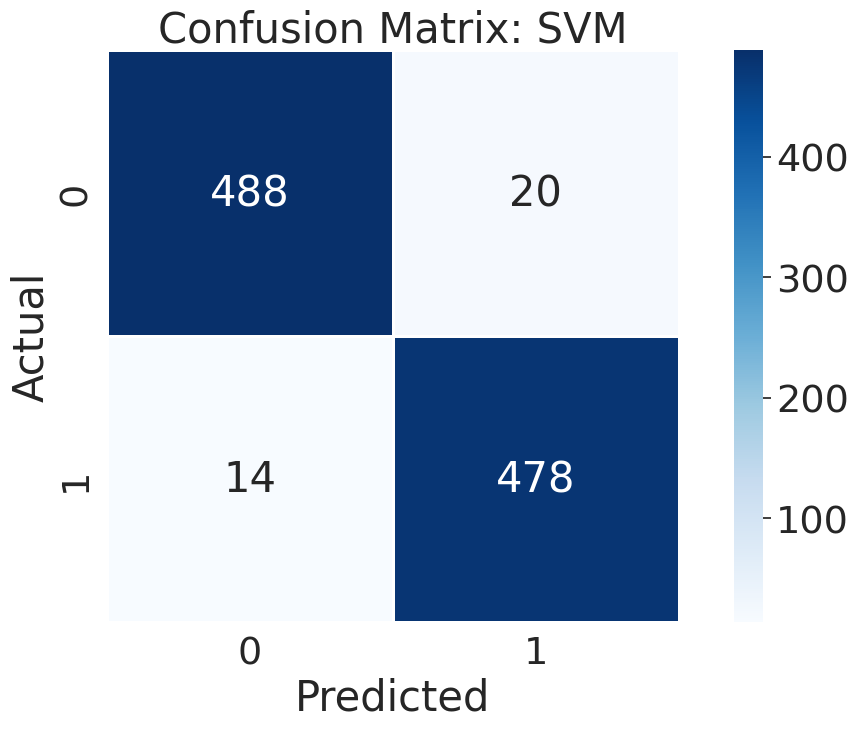

AUC Score = 0.994


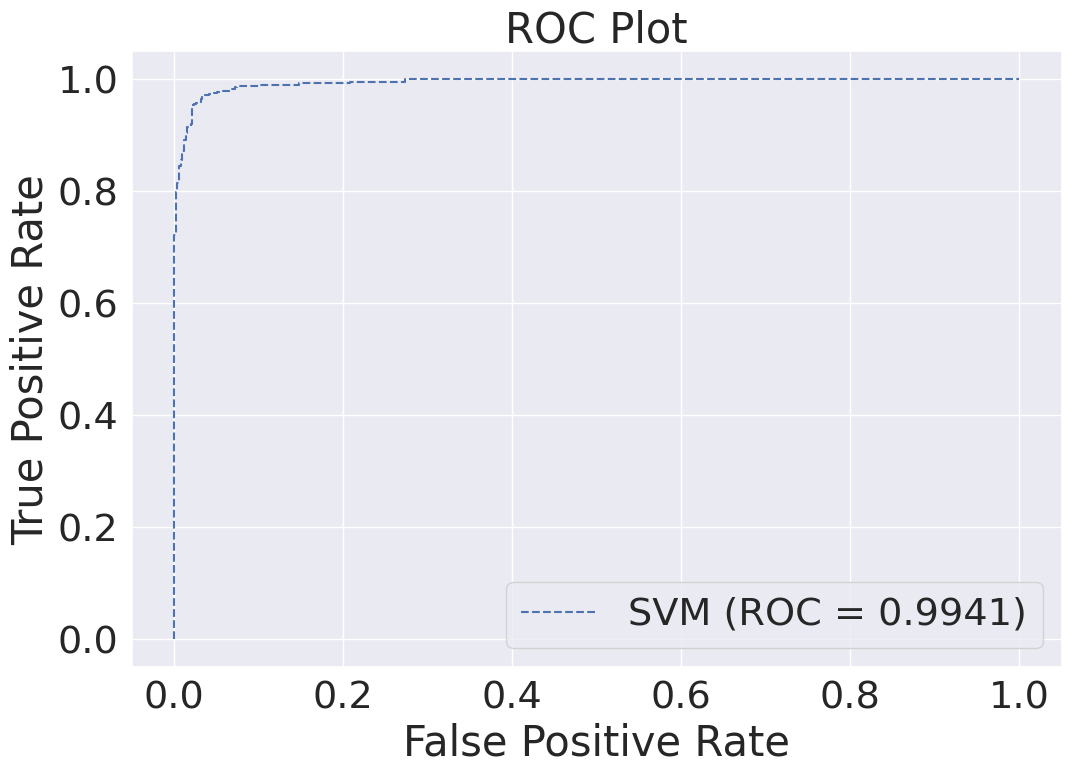

In [21]:
from sklearn.svm import SVC
# Initialize SVM model
model_svm = SVC(kernel='rbf', probability=True, random_state=42)

# Measure training time
start_train = time.time()
model_svm.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train
print(f"Training Time: {training_time:.4f} seconds")

# Measure testing (prediction) time
start_test = time.time()
predictions_svm = model_svm.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test
print(f"Testing Time: {testing_time:.4f} seconds")

# Accuracy scores
train_accuracy = accuracy_score(y_train, model_svm.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_svm)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification Report
report = classification_report(y_test, predictions_svm)
print("Classification Report:")
print(report)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_svm)
precision = precision_score(y_test, predictions_svm, average='macro')
recall = recall_score(y_test, predictions_svm, average='macro')
f1 = f1_score(y_test, predictions_svm, average='macro')
mcc = matthews_corrcoef(y_test, predictions_svm)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_svm)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True positive = ', TP)
print('False positive = ', FP)
print('False negative = ', FN)
print('True negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: SVM')
plt.tight_layout()
plt.show()

# ROC Curve and AUC (need probability estimates)
svm_probs = model_svm.predict_proba(X_test)[:, 1]
svm_auc = roc_auc_score(y_test, svm_probs)
print('AUC Score = %.3f' % svm_auc)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

plt.figure(figsize=(12, 8))
plt.plot(svm_fpr, svm_tpr, linestyle='--', label='SVM (ROC = %0.4f)' % svm_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Training Time: 0.1101 seconds
Testing Time: 0.0011 seconds
Training Accuracy: 0.9437777777777778
Testing Accuracy: 0.932
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       508
           1       0.93      0.93      0.93       492

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000

Accuracy Score: 0.932
Precision Score: 0.9319662031332512
Recall Score: 0.9320145957365086
F1 Score: 0.9319866693872
Matthews Correlation Coefficient: 0.8639807975144959
*******************************************
[[473  35]
 [ 33 459]]
True positive =  459
False positive =  35
False negative =  33
True negative =  473
*******************************************


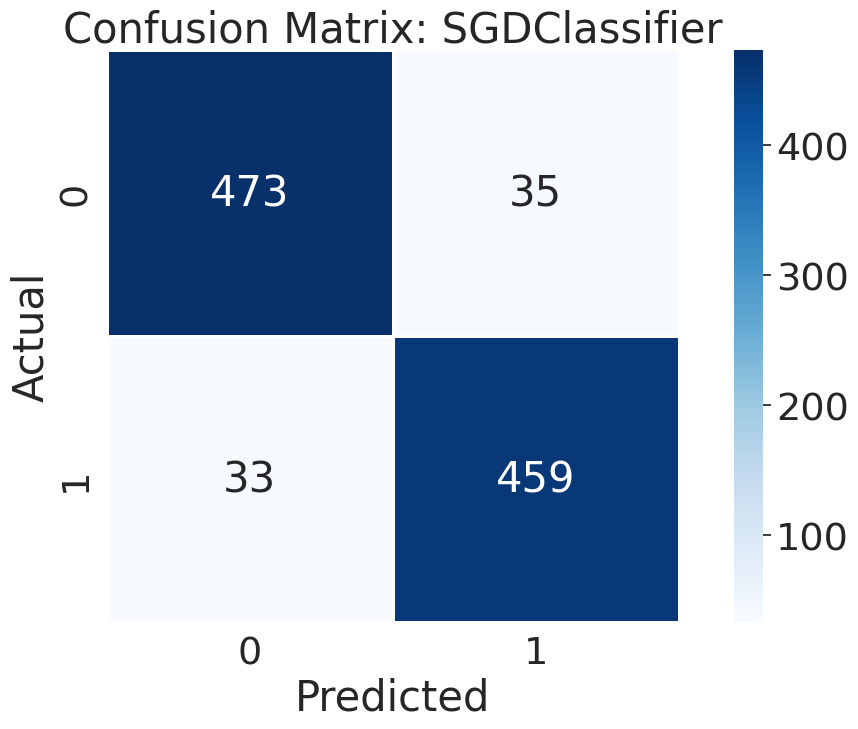

AUC Score = 0.984


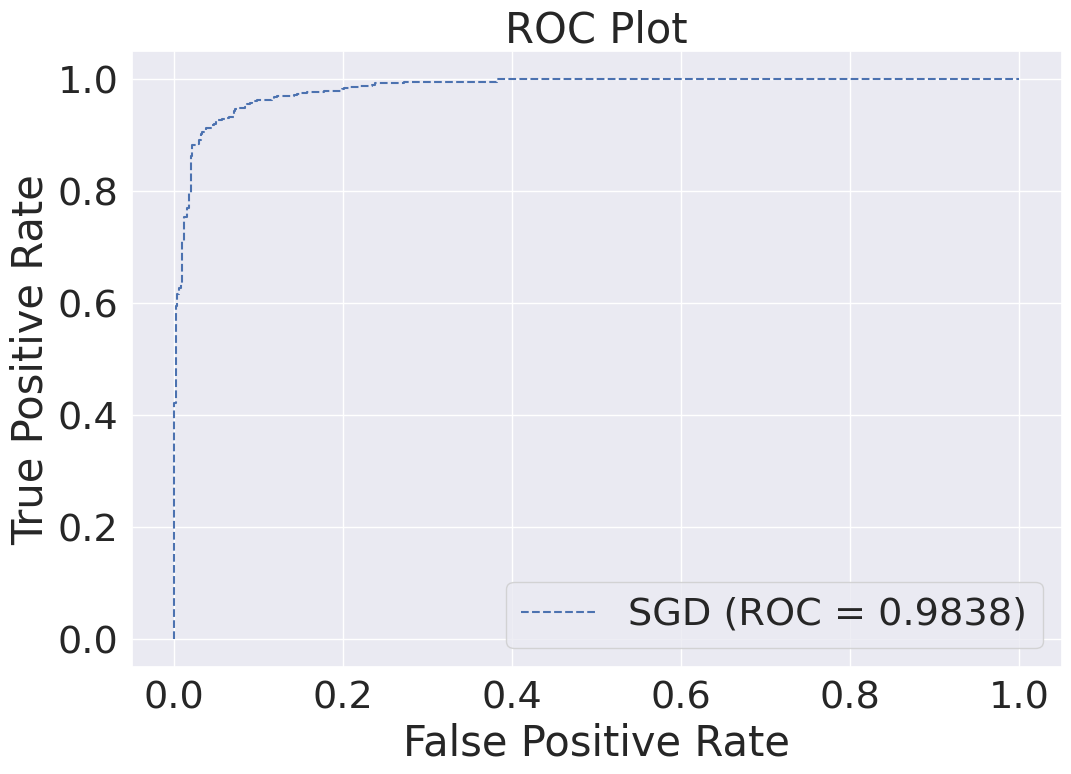

In [22]:
from sklearn.linear_model import SGDClassifier
# Initialize SGD Classifier
model_sgd = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)

# Measure training time
start_train = time.time()
model_sgd.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train
print(f"Training Time: {training_time:.4f} seconds")

# Measure testing (prediction) time
start_test = time.time()
predictions_sgd = model_sgd.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test
print(f"Testing Time: {testing_time:.4f} seconds")

# Accuracy scores
train_accuracy = accuracy_score(y_train, model_sgd.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_sgd)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Classification Report
report = classification_report(y_test, predictions_sgd)
print("Classification Report:")
print(report)

# Evaluation metrics
accuracy = accuracy_score(y_test, predictions_sgd)
precision = precision_score(y_test, predictions_sgd, average='macro')
recall = recall_score(y_test, predictions_sgd, average='macro')
f1 = f1_score(y_test, predictions_sgd, average='macro')
mcc = matthews_corrcoef(y_test, predictions_sgd)

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print('*******************************************')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_sgd)
print(conf_matrix)

TN, FP, FN, TP = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
print('True positive = ', TP)
print('False positive = ', FP)
print('False negative = ', FN)
print('True negative = ', TN)
print('*******************************************')

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.5)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 30}, fmt=".0f", square=True,
            cmap=plt.cm.Blues, linewidths=0.8)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: SGDClassifier')
plt.tight_layout()
plt.show()

# ROC Curve and AUC
sgd_probs = model_sgd.predict_proba(X_test)[:, 1]
sgd_auc1 = roc_auc_score(y_test, sgd_probs)
print('AUC Score = %.3f' % sgd_auc1)

sgd_fpr, sgd_tpr, _ = roc_curve(y_test, sgd_probs)

plt.figure(figsize=(12, 8))
plt.plot(sgd_fpr, sgd_tpr, linestyle='--', label='SGD (ROC = %0.4f)' % sgd_auc1)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


2025-10-31 19:30:26,786 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.7, 'k': 30, 'p': 2}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=0.0182
2025-10-31 20:16:55,714 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.01822222222222225, best pos: [2.15202724e+02 1.84143003e+01 1.28186116e-01 2.60143117e+00
 1.72449493e+00 6.82205205e-01]



Best Hyperparameters from PSO:
  n_estimators       : 215
  max_depth          : 18
  max_features       : 0.128
  min_samples_split  : 2
  min_samples_leaf   : 1
  criterion          : entropy

Model Evaluation:
Training Accuracy : 0.9997
Testing Accuracy  : 0.9870
Precision          : 0.9870
Recall             : 0.9870
F1 Score           : 0.9870
Matthews Corrcoef  : 0.9740
Training Time      : 1.0149 seconds
Testing Time       : 0.0855 seconds

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       508
           1       0.98      0.99      0.99       492

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

Confusion Matrix:
[[500   8]
 [  5 487]]
True Positives : 487
False Positives: 8
False Negatives: 5
True Negatives : 500


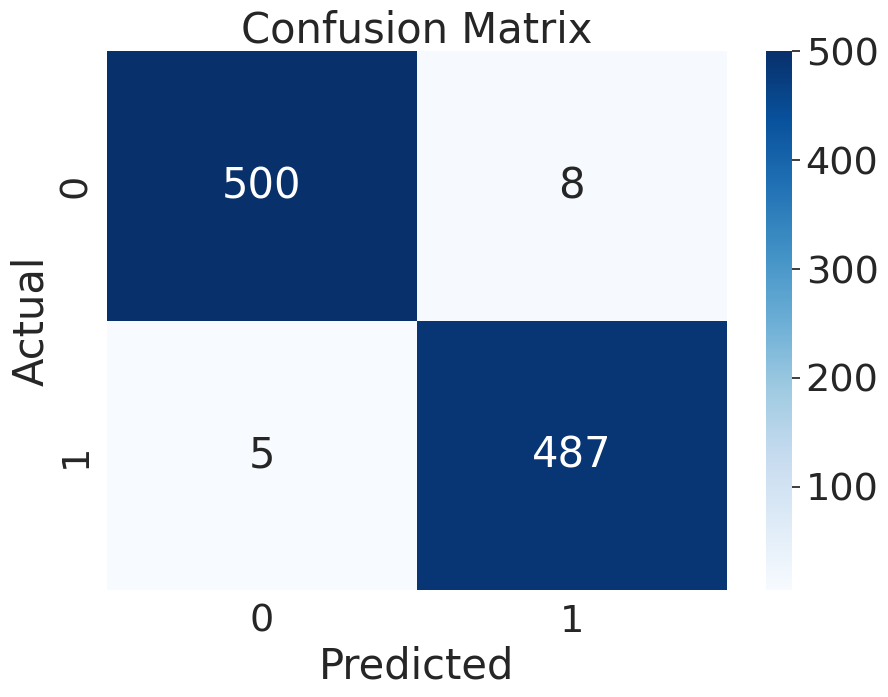

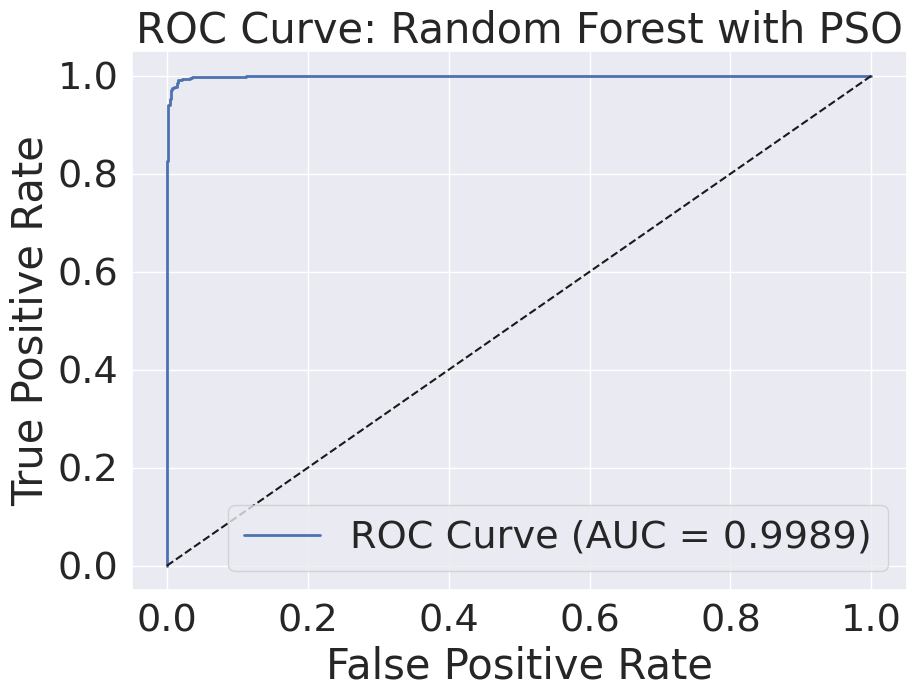

In [23]:
import time

# -----------------------------------------------------------
# PSO search space for Random Forest with 6 hyperparameters
# -----------------------------------------------------------
# [n_estimators, max_depth, max_features, min_samples_split, min_samples_leaf, criterion]
bounds = (
    np.array([50, 0, 0.1, 2, 1, 0]),       # Lower bounds
    np.array([500, 30, 1.0, 20, 20, 1])    # Upper bounds
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=33)

def objective_function(params):
    losses = []
    for p in params:
        n_estimators = int(p[0])
        max_depth = None if int(p[1]) == 0 else int(p[1])
        max_features = float(p[2])
        min_samples_split = int(p[3])
        min_samples_leaf = int(p[4])
        criterion = 'gini' if int(round(p[5])) == 0 else 'entropy'

        clf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            max_features=max_features,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            criterion=criterion,
            random_state=42,
            n_jobs=-1
        )

        score = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy').mean()
        losses.append(1 - score)

    return np.array(losses)

# -----------------------------------------------------------
# Run PSO
# -----------------------------------------------------------
options = {'c1': 1.5, 'c2': 1.5, 'w': 0.7, 'k': 30, 'p': 2}
optimizer = ps.single.GlobalBestPSO(n_particles=30, dimensions=6, options=options, bounds=bounds)
best_cost, best_params = optimizer.optimize(objective_function, iters=10)

# -----------------------------------------------------------
# Train optimized model
# -----------------------------------------------------------
best_n_estimators = int(best_params[0])
best_max_depth = None if int(best_params[1]) == 0 else int(best_params[1])
best_max_features = float(best_params[2])
best_min_samples_split = int(best_params[3])
best_min_samples_leaf = int(best_params[4])
best_criterion = 'gini' if int(round(best_params[5])) == 0 else 'entropy'

print("\nBest Hyperparameters from PSO:")
print(f"  n_estimators       : {best_n_estimators}")
print(f"  max_depth          : {best_max_depth}")
print(f"  max_features       : {best_max_features:.3f}")
print(f"  min_samples_split  : {best_min_samples_split}")
print(f"  min_samples_leaf   : {best_min_samples_leaf}")
print(f"  criterion          : {best_criterion}")

model_rf = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    max_features=best_max_features,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    criterion=best_criterion,
    random_state=42,
    n_jobs=-1
)

# -----------------------------------------------------------
# Measure Training Time
# -----------------------------------------------------------
start_train = time.time()
model_rf.fit(X_train, y_train)
end_train = time.time()
training_time = end_train - start_train

# -----------------------------------------------------------
# Measure Testing Time
# -----------------------------------------------------------
start_test = time.time()
predictions_rf = model_rf.predict(X_test)
end_test = time.time()
testing_time = end_test - start_test

prob_rf = model_rf.predict_proba(X_test)[:, 1]  # for ROC curve

# -----------------------------------------------------------
# Metrics
# -----------------------------------------------------------
train_accuracy = accuracy_score(y_train, model_rf.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_rf)
precision = precision_score(y_test, predictions_rf, average='macro')
recall = recall_score(y_test, predictions_rf, average='macro')
f1 = f1_score(y_test, predictions_rf, average='macro')
mcc = matthews_corrcoef(y_test, predictions_rf)
report = classification_report(y_test, predictions_rf)

print("\nModel Evaluation:")
print(f"Training Accuracy : {train_accuracy:.4f}")
print(f"Testing Accuracy  : {test_accuracy:.4f}")
print(f"Precision          : {precision:.4f}")
print(f"Recall             : {recall:.4f}")
print(f"F1 Score           : {f1:.4f}")
print(f"Matthews Corrcoef  : {mcc:.4f}")
print(f"Training Time      : {training_time:.4f} seconds")
print(f"Testing Time       : {testing_time:.4f} seconds")
print("\nClassification Report:\n", report)

# -----------------------------------------------------------
# Confusion Matrix
# -----------------------------------------------------------
conf_matrix = confusion_matrix(y_test, predictions_rf)
print("Confusion Matrix:")
print(conf_matrix)

TN, FP, FN, TP = conf_matrix.ravel()
print(f"True Positives : {TP}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")
print(f"True Negatives : {TN}")

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------------------------------------
# ROC Curve & AUC
# -----------------------------------------------------------
auc = roc_auc_score(y_test, prob_rf)
fpr, tpr, _ = roc_curve(y_test, prob_rf)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest with PSO')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [24]:
# -----------------------------------------------------------
# Explainable AI Integration using LIME
# -----------------------------------------------------------
from lime import lime_tabular
import numpy as np

# Create a LIME explainer
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns if hasattr(X_train, 'columns') else [f"Feature_{i}" for i in range(X_train.shape[1])],
    class_names=['Class 0', 'Class 1'],  # rename based on your dataset
    mode='classification'
)

# Select a single instance to explain
sample_index = 0
sample = X_test[sample_index, :] if isinstance(X_test, np.ndarray) else X_test.iloc[sample_index, :].values

# Generate LIME explanation
lime_exp = lime_explainer.explain_instance(
    data_row=sample,
    predict_fn=model_rf.predict_proba,
    num_features=10  # top 10 features contributing to the prediction
)

# Show explanation in a readable table
print("\nLIME Explanation for Sample Index =", sample_index)
lime_exp.as_list()

# Display interactive visualization (works in notebooks)
lime_exp.show_in_notebook(show_table=True)



LIME Explanation for Sample Index = 0


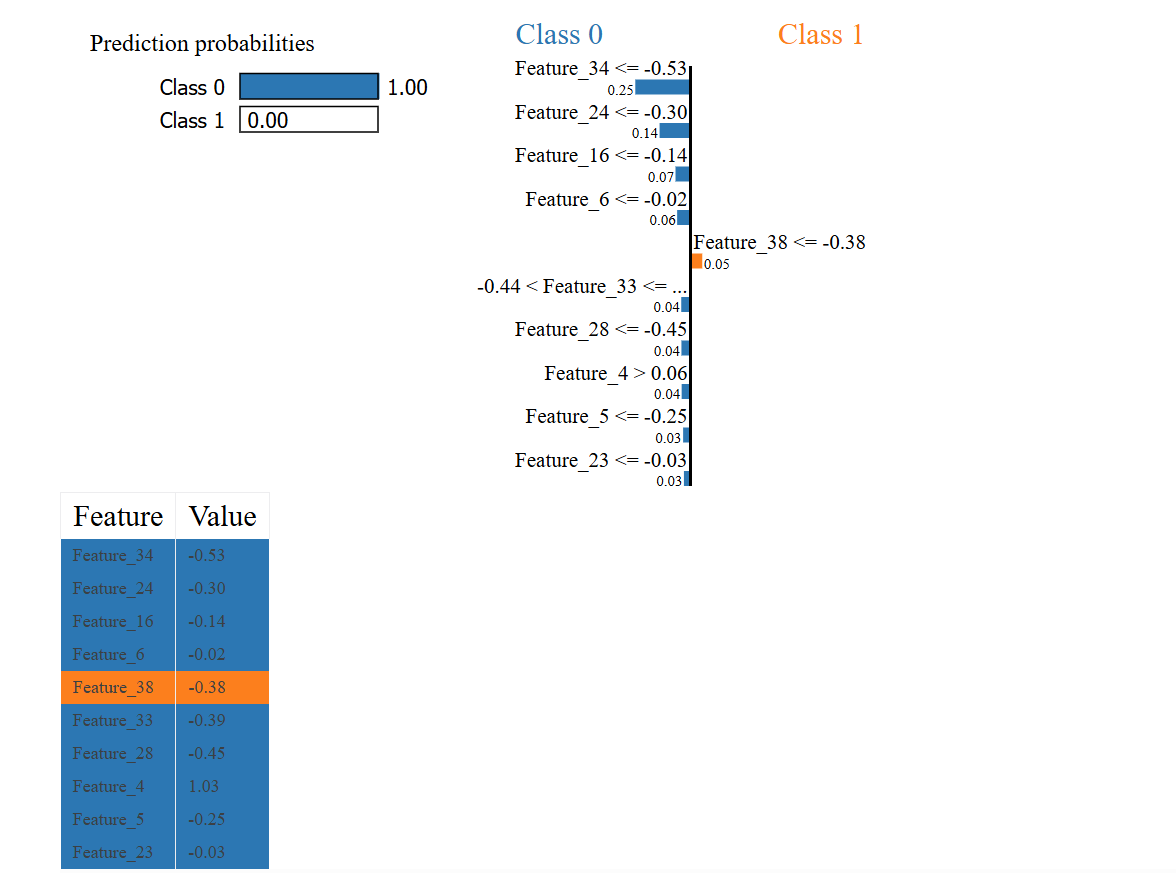